# Мобильные приложения — Выделение групп пользователей на основе их поведения по Retantion Rate и Конверсии в целевое действие

**Презентация по исследованию групп пользователей в мобильном приложении:** 
https://drive.google.com/file/d/1JP6oJeBiB7jMbq85w8CaF7UbAlj5kIJr/view?usp=sharing

**Дашбор в Tableau:**

https://public.tableau.com/views/Mobile_app_16861524099310/Project_dashbord?:language=en-US&:display_count=n&:origin=viz_share_link

### **План исследования**

**Шаг 1. Загрузить данные и получить первичное представление о структуре и наполнении.**
- общая информация о данных через info().

**Шаг 2. Предобработка данных, подготовка данных к анализу, оценка корректности сбора данных.**
- проверка и обработка дубликатов и неявных дубликатов;
- проверка и наполнение пропущенных значений;
- проверка на артефакты;
- возможная проверка данных по медианному значению;
- проверка типа данных и замена при необходимости;
- проверка и замена при необходимости названия столбцов;
- работа со столбцом дата, выделить необходимый столбец для анализа;
- категоризация данных по событиям, времени и источникам. 

**Шаг 3.Исследовательский анализ EDA по поведению пользователей в приложении**
- Retantion Rate («коэффициент удержания»)
- Время, проведенное в приложении
- Частота действий
- Конверсия в целевое действие — просмотр контактов
- написать вывод

**Шаг 4. Сегментация пользователей на 3-4 группы (по 1 или двум признакам)**
    
- Для каждой группы рассчитываем Retention rate 
- Для каждой группы рассчитываем конверсию в целевое действие
- Написать вывод
  
**Шаг 5. Проверка статистических гипотез.**
- Гипотеза 1. Проверить гипотезу о различии или равенстве конверсий в просмотры контактов между теми пользователями, которые совершили установку приложения, прийдя с источника yandex и пользователя, совершившими установки, из источника google.

Нулевая гипотеза Н0: Доли пользователей, совершивших рассматриваеммое событие (просмотр контактов), равны.

Альтернативная гипотеза Н1: Доли пользователей, совершивших рассматриваеммое событие, различаются

- Гипотеза 2. Проверить гипотезу о различии или равенстве проведенном среднем времи в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его.

Нулевая гипотеза Н0: Среднее время в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его, равно.

Альтернативная гипотеза Н1: Среднее время в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его, различается.


**Шаг 6. Общие выводы и рекомендации.** 

**Шаг 7. Подготовка презентацию.**

**Шаг 8. Подготовка дашборда Tableau.**

### **Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:
- event.time — время совершения
- event.name — название события
- user.id — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
- userId — идентификатор пользователя
- source — источник, с которого пользователь установил приложение

Расшифровки событий:
- advert_open — открытие карточки объявления
- photos_show — просмотр фотографий в объявлении
- tips_show — пользователь увидел рекомендованные объявления
- tips_click — пользователь кликнул по рекомендованному объявлению
- contacts_show и show_contacts — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- contacts_call — пользователь позвонил по номеру телефона на карточке объявления
- map — пользователь открыл карту размещенных объявлений
- search_1 — search_7 — разные события, связанные с поиском по сайту
- favorites_add — добавление объявления в избранное

### **Цели исследования:**

- Оценить корректности сбора данных
- Выделить группы пользователей по метрикам- RR, время в приложении, частота событий, конверсия в ЦД
- Провести исследовательский анализ данных
- Работа с аудиторией - сегментация пользователей на основе действий
- Проверка статистических гипотез

### **Задачи исследования:**

Дать ответы на вопросы:
1.    Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?
2.    Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?


### **Шаг 1. Загрузить данные и получить первичное представление о структуре и наполнении**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as mth
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

from scipy import stats as st
import plotly.graph_objs as go
from IPython.display import display_html
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.simplefilter('ignore')

In [2]:
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
mobile_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')

In [3]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
mobile_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


#### **Вывод:**



данные выгружены,пропусков нет в них, есть некорректное заполнение названий столбцов, а также необходимо сменить тип данных столцов для дальнейшей работы. Возможное объединение таблиц, так как они имеют общие данные, которые удобней анализировать вместе.

### **Шаг 2. Предобработка данных, подготовка данных к анализу, оценка корректности сбора данных**

In [5]:
#переименование столбцов
mobile_dataset.columns = ['event_time', 'event_name', 'user_id']
mobile_sources.columns = ['user_id', 'source']

In [6]:
# приводим к типу даты время совершения действия
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format='%Y-%m-%dT%H:%M:%S').dt.round('1S')

In [7]:
#смотрим пропуски
print('Количество пропущенных значений в таблице:\n', mobile_sources.isna().sum())

Количество пропущенных значений в таблице:
 user_id    0
source     0
dtype: int64


In [8]:
#смотрим пропуски
print('Количество пропущенных значений в таблице:\n', mobile_dataset.isna().sum())

Количество пропущенных значений в таблице:
 event_time    0
event_name    0
user_id       0
dtype: int64


In [9]:
# число дубликатов
print('\nЧисло дубликатов:', mobile_dataset.duplicated().sum())
print('\nЧисло дубликатов:', mobile_sources.duplicated().sum())


Число дубликатов: 1118

Число дубликатов: 0


In [10]:
mobile_dataset.head(5)

event_time   event_name                               user_id
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894
2 2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c
3 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894
4 2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c

In [11]:
#кол-во ункиальных пользователей в mobile_dataset
print('Кол-во уникальных пользователей:', len(mobile_dataset['user_id'].unique()))

Кол-во уникальных пользователей: 4293


In [12]:
#кол-во ункиальных пользователей в mobile_sources
print('Кол-во уникальных пользователей:', len(mobile_sources['user_id'].unique()))

Кол-во уникальных пользователей: 4293


In [13]:
set(mobile_dataset['user_id']) == set(mobile_sources['user_id'])

True

Кол-во уникальныз пользователей совпадает в обоих файлах и равно 4293 ед. Можно объединить две таблицы в одну для удобства использования в дальнейшем

In [14]:
data = mobile_dataset.merge(mobile_sources, on='user_id', how = 'right')
data.head(5)

event_time   event_name                               user_id  \
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
3 2019-10-07 00:01:28  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
4 2019-10-07 00:01:35    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   

  source  
0  other  
1  other  
2  other  
3  other  
4  other

In [15]:
# преобразование данных о времени
data['event_time'] = pd.to_datetime(data['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')
# добавляем информацию о дне (без времени)
#data['event_date'] = data['event_time'].astype('datetime64[D]')
data['event_date'] = pd.to_datetime(data['event_time']).dt.floor("S")
display(data.dtypes)
display(data.head(10))

event_time    datetime64[ns]
event_name            object
user_id               object
source                object
event_date    datetime64[ns]
dtype: object

event_time   event_name                               user_id  \
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
3 2019-10-07 00:01:28  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
4 2019-10-07 00:01:35    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
5 2019-10-07 00:01:55  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
6 2019-10-07 00:02:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
7 2019-10-07 00:02:25  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
8 2019-10-07 00:02:31    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
9 2019-10-07 00:03:02    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   

  source          event_date  
0  other 2019-10-07 00:00:00  
1  other 2019-10-07 00:00:01  
2  other 2019-10-07 00:00:07  
3  other 2019-10-07 00:01:28  
4  other 2019-10-07 00:01:35  
5  other 2019-10-07 00:01:55  
6  other 2019-10-07 00:02:01  
7  other 2019-10-07 00:02:25  
8  other 2019-10-07 00:02:31  
9  other 2019-10-07 00:03:02

In [16]:
#проверка правильности объединения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   event_date  74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.4+ MB


In [17]:
# проверяем наличие дубликатов в таблице
print('Количество дубликатов в таблице:', data.duplicated().sum())

Количество дубликатов в таблице: 1118


In [18]:
# выводим задублированные строки
data_duplicate = data.duplicated(keep=False).to_frame().rename(columns={0:'dupl'})

In [19]:
data_d = data_duplicate[data_duplicate['dupl'] == True]

In [20]:
display(data[data.index.isin(data_d.index)].sort_values(by='user_id', ascending = True))

event_time   event_name                               user_id  \
44232 2019-10-22 20:49:43  photos_show  00753c79-ea81-4456-acd0-a47a23ca2fb9   
44231 2019-10-22 20:49:43  photos_show  00753c79-ea81-4456-acd0-a47a23ca2fb9   
49035 2019-10-22 13:02:27          map  007d031d-5018-4e02-b7ee-72a30609173f   
49034 2019-10-22 13:02:27          map  007d031d-5018-4e02-b7ee-72a30609173f   
13732 2019-10-10 14:46:37    tips_show  017c6afc-965d-4c94-84ee-f0e326998e30   
...                   ...          ...                                   ...   
27825 2019-10-14 21:02:16  photos_show  fc546918-70e2-4a04-a9a2-bc358f1db5c9   
4716  2019-10-07 20:32:50  photos_show  ffc01466-fdb1-4460-ae94-e800f52eb136   
4715  2019-10-07 20:32:50  photos_show  ffc01466-fdb1-4460-ae94-e800f52eb136   
18982 2019-10-27 20:00:18    tips_show  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   
18981 2019-10-27 20:00:18    tips_show  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   

       source          event_date  
44232  yandex 2019-10-22 20:49:43  
44231  yandex 2019-10-22 20:49:43  
49035  yandex 2019-10-22 13:02:27  
49034  yandex 2019-10-22 13:02:27  
13732   other 2019-10-10 14:46:37  
...       ...                 ...  
27825  yandex 2019-10-14 21:02:16  
4716   yandex 2019-10-07 20:32:50  
4715   yandex 2019-10-07 20:32:50  
18982  google 2019-10-27 20:00:18  
18981  google 2019-10-27 20:00:18  

[2039 rows x 5 columns]

In [21]:
# удаляем дубликаты
data = data.drop_duplicates().reset_index(drop=True)
print('\nЧисло дубликатов:', data.duplicated().sum())


Число дубликатов: 0


In [22]:
#кол-во ункиальных событий в data
print('Кол-во уникальных событий:', len(data['event_name'].unique()))

Кол-во уникальных событий: 16


In [23]:
# за какой период представлены данные в data
print('Минимальная дата событий: {}, максимальная дата событий: {}'.format(data['event_time'].min(), data['event_time'].max()))

Минимальная дата событий: 2019-10-07 00:00:00, максимальная дата событий: 2019-11-03 23:58:13


In [24]:
#кол-во ункиальных источников в source
print('Кол-во уникальных источников:', len(data['source'].unique()))
print('Названия источников:', data['source'].unique())

Кол-во уникальных источников: 3
Названия источников: ['other' 'yandex' 'google']


In [25]:
# кол-во событий по источникам в data
data['source'].value_counts().to_frame()

source
yandex   33854
google   20171
other    19054

In [26]:
#кол-во событий по действиям в data
data['event_name'].value_counts().to_frame()

event_name
tips_show           39892
photos_show          9372
advert_open          6145
contacts_show        4302
map                  3760
search_1             3489
favorites_add        1414
search_5             1049
tips_click            811
search_4              701
contacts_call         538
search_3              521
search_6              460
search_2              324
search_7              222
show_contacts          79

Самое частое событие "пользователь увидел рекомендованные объявления - tips_show". Самое редкое 'show_contacts', однако оно равно событию 'contacts_show', так что одно из событий seach является самым редким по приложению. Однако событий  "клик по рекоменованному объявлению - tips_click" всего 811. Конверсия из показов в 40 тысяч в клики 811 ед всего 2%. Возможно  рекомендованные объявления не релевантные показываются.

Seach_N - все поиски по приложению можно объединить в единый пул данных, так как нет точных дданнных что именно искали пользователи. 
А также события contacts_show и show_contacts имеют один и тот же смысл. Их также надо объединить.

In [27]:
# объединим данные по действиям seach
def name(i):
    if 'search' in i:
        new_name = 'search'
        return new_name
    return i
data['event_name'] = data['event_name'].apply(name)

In [28]:
# объединим данные по действиям contacts_show и show_contacts

data['event_name'] = data['event_name'].replace('show_contacts', 'contacts_show')
data['event_name'].value_counts().to_frame()

event_name
tips_show           39892
photos_show          9372
search               6766
advert_open          6145
contacts_show        4381
map                  3760
favorites_add        1414
tips_click            811
contacts_call         538

In [29]:
# посмотрим на данные в таблице, для выявления выбрасов и сомнительных данных
data.describe()

event_time event_name                               user_id  \
count                 73079      73079                                 73079   
unique                71378          9                                  4293   
top     2019-10-17 13:55:17  tips_show  cb36854f-570a-41f4-baa8-36680b396370   
freq                      3      39892                                   472   
first   2019-10-07 00:00:00        NaN                                   NaN   
last    2019-11-03 23:58:13        NaN                                   NaN   

        source           event_date  
count    73079                73079  
unique       3                71378  
top     yandex  2019-10-17 13:55:17  
freq     33854                    3  
first      NaN  2019-10-07 00:00:00  
last       NaN  2019-11-03 23:58:13

В целом данные кажутся правдоподобными и не вызывающими настороженности

#### **Выводы:**

- проверили на дубликаты, удалили
- объеднили данных таблиц для удобства исследования
- изменены названия столбцов для удобства написания кода
- объединены события seach в единый пул, а также объедены данны по событиям 'show_contacts', 'contacts_show' - так как данные события имели единый смысл по действиям
- обработали дату событий и вывели в отдельные столбцы данные по году, месяцу, недели, дню и времени события - для дальнейших исследований.
- Самое частое событие "пользователь увидел рекомендованные объявления - tips_show". Однако событий  "клик по рекоменованному объявлению - tips_click" всего 811. Конверсия из показов в 40 тысяч в клики 811 ед всего 2%. Возможно  рекомендованные объявления не релевантные показываются.
- самое редкое событие в приложении contacts_call- кода пользователь позвонил по номеру в карточке объявления. Это и есть наше целевое действие по исследованию. 
- всего три источника откуда приходят посетитеи в приложение, самый популярный из них yandex. 
- в данных приставленны собития за период с 2019-10-07 по 2019-11-03 или 28 полных дней.
- Кол-во уникальных пользователей: 4293 ед, уникальных событий  -9, уникальных источника - 3.


### **Шаг 3. Исследовательский анализ EDA по поведению пользователей в приложении**


#### **Изучим данные**

##### **Посмотрим сколько в среднем событий приходится на пользователя**

In [30]:
print('Всего уникальных пользователей:', data.user_id.nunique())

Всего уникальных пользователей: 4293


In [31]:
#составлю таблицу по количеству событий на каждого уникального пользователя
avg_events_per_user = data.pivot_table(index='user_id', values='event_name', aggfunc='count')
avg_events_per_user.sort_values('event_name', ascending=False) 

event_name
user_id                                         
cb36854f-570a-41f4-baa8-36680b396370         472
e13f9f32-7ae3-4204-8d60-898db040bcfc         462
9ce63488-758a-481a-bcb5-a02b467e1d84         407
21230dd9-2f7f-4b77-a436-43d4d10388e0         398
be1449f6-ca45-4f94-93a7-ea4b079b8f0f         396
...                                          ...
2d7e94eb-3b0a-4ae5-ac4e-62ef1e216c90           1
e85710d2-a93c-4d0c-b1a2-efcbafad853d           1
af23f38a-cfa8-4e82-83d9-4914c11c1bdb           1
2fb6515e-a902-4329-8080-749bcf4f8053           1
61d27241-64d3-4af0-9671-253aea8c90ed           1

[4293 rows x 1 columns]

In [32]:
# выведу среднее значение по событиям, используя функцию медианы
median = avg_events_per_user['event_name'].median()
print('Медианное кол-во событий на одного пользователя: {}.'. format(avg_events_per_user['event_name'].median()))

Медианное кол-во событий на одного пользователя: 9.0.


In [33]:
#расчитаем кол-во событий на одного пользователя в целом и опишем данные
event_per_user = data.groupby('user_id')['event_name'].count()
event_per_user.describe(percentiles=[0.05, 0.25, 0.5, 0.90, 0.95, 0.99])

count    4293.000000
mean       17.022828
std        28.617646
min         1.000000
5%          3.000000
25%         5.000000
50%         9.000000
90%        35.000000
95%        58.000000
99%       127.160000
max       472.000000
Name: event_name, dtype: float64

In [34]:
# группируем данные по пользователю и посчитаем количество событий
events_sum = data.groupby('user_id')[['event_name']].count().reset_index()
print(f"Количество пользователей, совершивших лишь одно действие: {len(events_sum[events_sum['event_name'] == 1])}")

Количество пользователей, совершивших лишь одно действие: 66


In [35]:
print(f"Количество пользователей, совершивших более 60 действий: {len(events_sum[events_sum['event_name'] >= 60])}")

Количество пользователей, совершивших более 60 действий: 206


Всего уникальных пользователей: 4293. 66 пользователей совершили всего одно действие, среднее количество действий - 17, медианное - 9, есть те, кто совершил и более 58 действий. Есть еще более 200 человек, которые совершили более 60 действий в приложении. Это порядком 1,3%, поэтому не буду их удалять, сильно на статистику не повлияет.

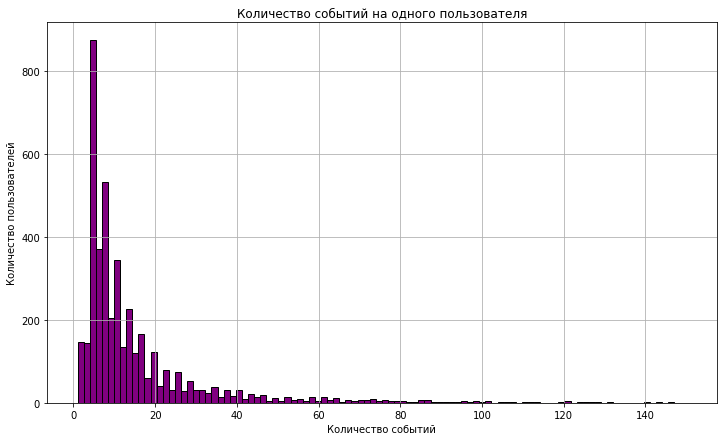

In [36]:
plt.figure(figsize=(12,7))
plt.hist(event_per_user, bins=100, range=(1,150), color = 'purple', edgecolor = 'black') 
plt.xlabel('Количество событий')
plt.grid()
plt.ylabel('Количество пользователей')
plt.title('Количество событий на одного пользователя');

Согласно графика и цифрам по данным видно, что выбросы есть по событиям и доходят до  150 событий на пользователя. Поэтому, лучше в данной ситуации ориентироваться не на среднюю величину по событиям, а на медиану. Кол-во событий не так много, не будем удалять данные.

In [37]:
#посмотрим какие чаще всего действия совершают пользователи и как много пользователей это делают
events_all = data.pivot_table(index='event_name', values='user_id', aggfunc={'count', 'nunique'}).rename(columns={'count':'all_events', 'nunique':'unique_events'}).reset_index()
events_all

event_name  all_events  unique_events
0    advert_open        6145            751
1  contacts_call         538            213
2  contacts_show        4381            981
3  favorites_add        1414            351
4            map        3760           1456
5    photos_show        9372           1095
6         search        6766           1666
7     tips_click         811            322
8      tips_show       39892           2801

Событие tips_show показывается почти всем пользователям в приложении в большом кол-ве. Но это не выброс, а показ, здесь все с данными в порядке. Его можно удалить при рассмотрение именно действий пользователей, так как это показ автоматический в приложении, а не действие пользователя.

In [38]:
event_per_user_new = data.query('event_name !="tips_show"').groupby(['user_id']).agg({'event_name':'count'})
event_per_user_new.describe(percentiles=[0.05, 0.25, 0.5, 0.90, 0.95, 0.99])

event_name
count  3586.000000
mean      9.254601
std      15.576030
min       1.000000
5%        1.000000
25%       3.000000
50%       5.000000
90%      19.000000
95%      31.000000
99%      75.000000
max     333.000000

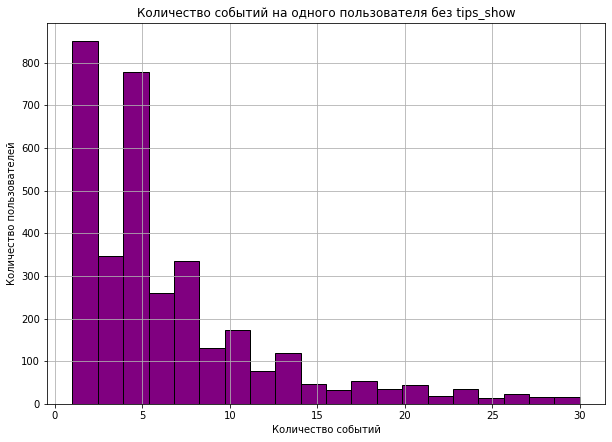

In [39]:
plt.figure(figsize=(10,7))
plt.hist(event_per_user_new, bins=20, range=(1,30),  color = 'purple', edgecolor = 'black') 
plt.xlabel('Количество событий')
plt.grid()
plt.ylabel('Количество пользователей')
plt.title('Количество событий на одного пользователя без tips_show');

Cреднее количество действий - 9, медианное - 5,  всего более 10% сделали 19 действий с приложением.
В основном пользователи делают 19 взаимодействий с приложением, есть выбросы до 333 взаимодействий.

##### **Построим распределение количества пользователей и событий по дате и времени**

In [40]:
data.head(5)

event_time   event_name                               user_id  \
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
3 2019-10-07 00:01:28  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
4 2019-10-07 00:01:35    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   

  source          event_date  
0  other 2019-10-07 00:00:00  
1  other 2019-10-07 00:00:01  
2  other 2019-10-07 00:00:07  
3  other 2019-10-07 00:01:28  
4  other 2019-10-07 00:01:35

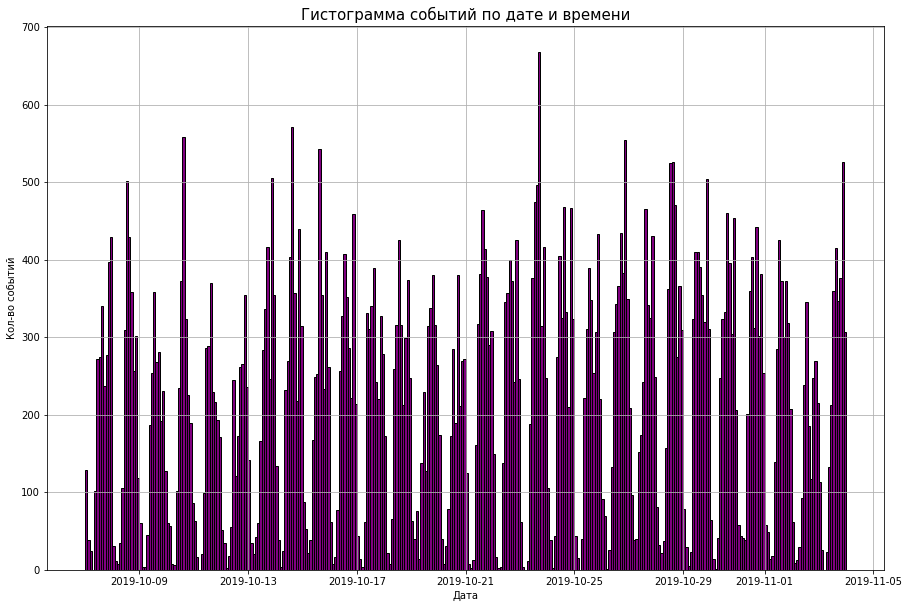

In [41]:
#Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? 
data.hist('event_time',  color = 'purple', edgecolor = 'black', bins=14*24, figsize=(15,10));
plt.xlabel('Дата')
plt.ylabel(r'Кол-во событий')
plt.title(r'Гистограмма событий по дате и времени', fontsize=15);
plt.show()

Гистограмма показывает что пользователи активно заходили и выполняли действия в приложении на протяжении всего анализируемого периода. Будем арссматривать весь период. Данные полные.

##### **Посмотрим распредление событий по дням**

In [42]:
#рассмотрим события по дням
data['event_dt'] = data['event_date'].dt.date
data_event_date = data.pivot_table(index =['event_dt'],values = ['user_id', 'event_name'], 
               aggfunc = {'user_id':'nunique', 'event_name': 'count'}).reset_index()
data_event_date['event_per_user']=data_event_date['event_name']/data_event_date['user_id']

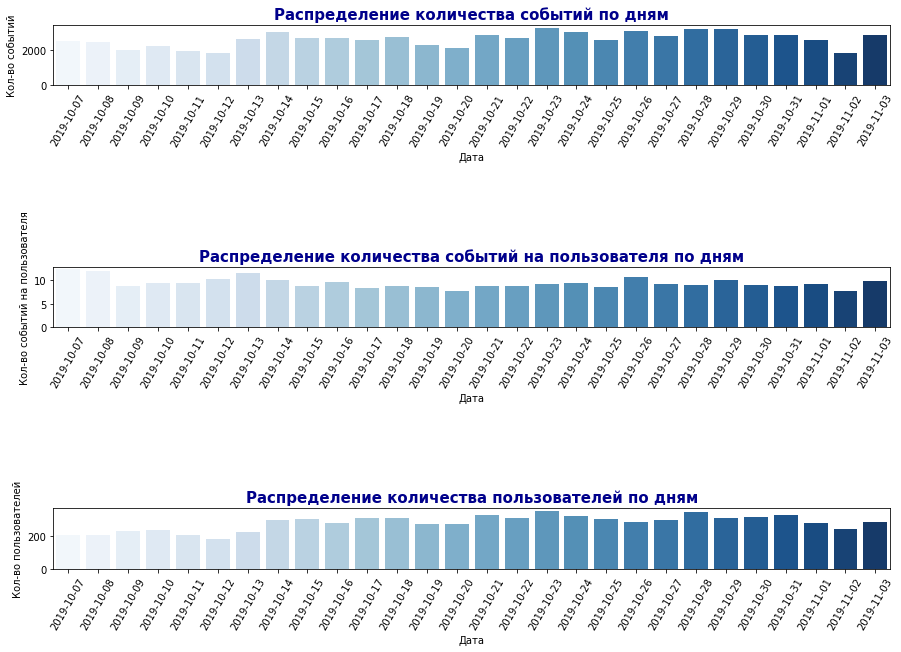

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(3, 1, 1)
sns.barplot(x='event_dt', y='event_name', data=data_event_date, palette = "Blues") 
plt.title('Распределение количества событий по дням', loc = 'center', fontdict={'size': 15, 'weight': 'bold', 'color': 'darkblue'}) 
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.xticks(rotation= 60)

plt.subplot(3, 1, 2)
sns.barplot(x='event_dt', y='event_per_user', data=data_event_date, palette = "Blues") 
plt.title('Распределение количества событий на пользователя по дням', loc = 'center', fontdict={'size': 15, 'weight': 'bold', 'color': 'darkblue'}) 
plt.xlabel('Дата')
plt.ylabel('Кол-во событий на пользователя')
plt.xticks(rotation= 60)

plt.subplot(3, 1, 3)
sns.barplot(x='event_dt', y='user_id', data=data_event_date, palette = "Blues") 
plt.title('Распределение количества пользователей по дням', loc = 'center', fontdict={'size': 15, 'weight': 'bold', 'color': 'darkblue'}) 
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.xticks(rotation= 60)
plt.subplots_adjust(wspace=1, hspace=3)
plt.show()

In [44]:
# уберем из данных событие tips_show. Посмотрим сиьно ли это отразится на данных
new_data =data.query('event_name !="tips_show"')
data_event_date_new = new_data.pivot_table(index =['event_dt'],values = ['user_id', 'event_name'], 
               aggfunc = {'user_id':'nunique', 'event_name': 'count'}).reset_index()
data_event_date_new['event_per_user']=data_event_date_new['event_name']/data_event_date_new['user_id']

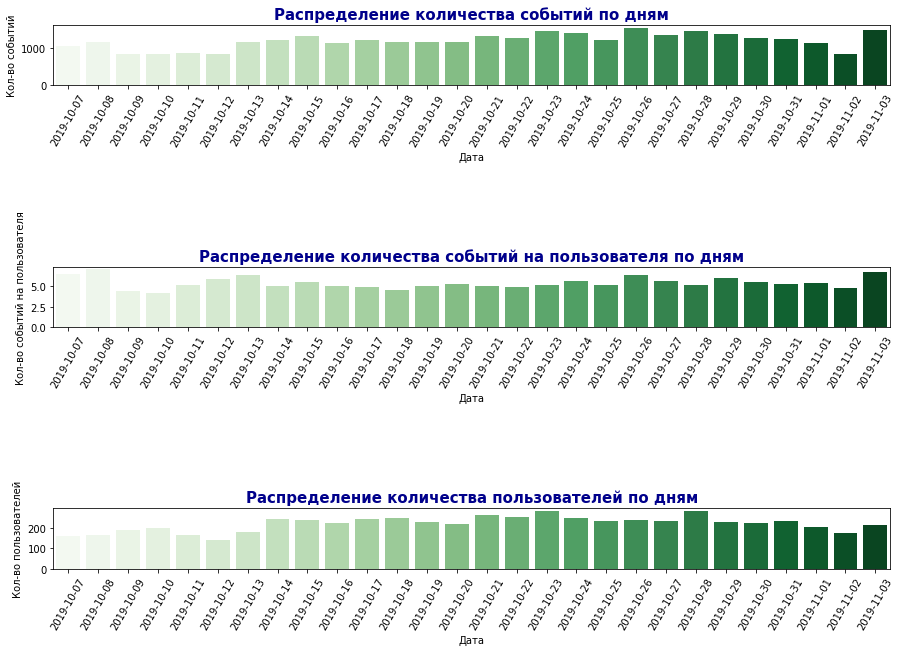

In [45]:
plt.figure(figsize=(15,10))

plt.subplot(3, 1, 1)
sns.barplot(x='event_dt', y='event_name', data=data_event_date_new, palette = "Greens") 
plt.title('Распределение количества событий по дням', loc = 'center', fontdict={'size': 15, 'weight': 'bold', 'color': 'darkblue'}) 
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.xticks(rotation= 60)

plt.subplot(3, 1, 2)
sns.barplot(x='event_dt', y='event_per_user', data=data_event_date_new, palette = "Greens") 
plt.title('Распределение количества событий на пользователя по дням', loc = 'center', fontdict={'size': 15, 'weight': 'bold', 'color': 'darkblue'}) 
plt.xlabel('Дата')
plt.ylabel('Кол-во событий на пользователя')
plt.xticks(rotation= 60)

plt.subplot(3, 1, 3)
sns.barplot(x='event_dt', y='user_id', data=data_event_date_new, palette = "Greens") 
plt.title('Распределение количества пользователей по дням', loc = 'center', fontdict={'size': 15, 'weight': 'bold', 'color': 'darkblue'}) 
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.xticks(rotation= 60)
plt.subplots_adjust(wspace=1, hspace=3)
plt.show()

Распредление пользователей по дням и кол-ва событий по дням достаточно равномерно. Попробуем тогда иначе разбить пользователей на сессии- чтобы возможно увидеть какую-то тенденцию

#### **Определим и выделим сессию пользователя в мобильном приложении**

In [46]:
data = data.sort_values(['user_id', 'event_date'])
data['diff'] = data.groupby('user_id')['event_date'].diff(1)
data['diff_sec'] = data['diff'].dt.total_seconds().fillna(value=0)


In [47]:
data['diff_sec'].describe(percentiles = [ 0.75, 0.85, 0.90, 0.95 ])

count    7.307900e+04
mean     1.337374e+04
std      9.000216e+04
min      0.000000e+00
50%      6.500000e+01
75%      1.710000e+02
85%      3.480000e+02
90%      8.742000e+02
95%      2.801610e+04
max      2.296195e+06
Name: diff_sec, dtype: float64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 2148 to 18690
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   event_time  73079 non-null  datetime64[ns] 
 1   event_name  73079 non-null  object         
 2   user_id     73079 non-null  object         
 3   source      73079 non-null  object         
 4   event_date  73079 non-null  datetime64[ns] 
 5   event_dt    73079 non-null  object         
 6   diff        68786 non-null  timedelta64[ns]
 7   diff_sec    73079 non-null  float64        
dtypes: datetime64[ns](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 5.0+ MB


По анализу видно, что медиана времени порядком 23 минут сессия = 1400 сек. Однако возьму за основу все же данные поисковых систем- где за сессия заканчивается через 30 минут после бездействия. Системы уже за нас все посчитали. Таймаут будет 30 минут.

In [49]:
#identify difference 30Min for each group with cumulative sum
g = (data.groupby('user_id')['event_date'].diff() > pd.Timedelta('30Min')).cumsum()
#create counter of groups - здесь важно учесть что session_id создается ункиальная для всех пользователей
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1
data.head(5)


event_time event_name                               user_id  \
2148 2019-10-07 13:39:46  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2149 2019-10-07 13:40:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2150 2019-10-07 13:41:06  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2151 2019-10-07 13:43:21  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2152 2019-10-07 13:45:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   

     source          event_date    event_dt            diff  diff_sec  \
2148  other 2019-10-07 13:39:46  2019-10-07             NaT       0.0   
2149  other 2019-10-07 13:40:31  2019-10-07 0 days 00:00:45      45.0   
2150  other 2019-10-07 13:41:06  2019-10-07 0 days 00:00:35      35.0   
2151  other 2019-10-07 13:43:21  2019-10-07 0 days 00:02:15     135.0   
2152  other 2019-10-07 13:45:31  2019-10-07 0 days 00:02:10     130.0   

      session_id  
2148           1  
2149           1  
2150           1  
2151           1  
2152           1

In [50]:
#проверим на пользователе
data.query('user_id=="004690c3-5a84-4bb7-a8af-e0c8f8fca64e"')

event_time   event_name                               user_id  \
40010 2019-10-18 22:14:06       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40011 2019-10-18 22:14:17       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40012 2019-10-18 22:17:41          map  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40013 2019-10-20 17:47:19       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40014 2019-10-20 17:47:20       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40015 2019-10-20 17:47:38       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40016 2019-10-20 17:47:42       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40017 2019-10-20 17:48:42    tips_show  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40018 2019-10-25 22:17:32       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40019 2019-10-25 22:25:09       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40020 2019-10-25 22:40:14          map  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40021 2019-10-25 22:45:50          map  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40022 2019-10-26 23:34:22       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40023 2019-10-26 23:34:24       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40024 2019-10-26 23:37:17    tips_show  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40025 2019-10-26 23:43:02    tips_show  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40026 2019-10-26 23:44:21    tips_show  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40027 2019-10-27 00:07:33          map  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40028 2019-10-27 00:08:28  advert_open  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40029 2019-10-27 00:09:32  advert_open  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40030 2019-10-27 00:09:57  advert_open  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40031 2019-10-27 00:10:23  advert_open  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40032 2019-10-27 00:12:12  advert_open  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40033 2019-10-27 20:18:09       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40034 2019-10-27 20:18:10       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40035 2019-10-27 20:18:24       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40036 2019-10-27 20:18:27       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40037 2019-10-31 21:02:56       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40038 2019-10-31 21:03:04       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40039 2019-10-31 21:03:21          map  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40040 2019-10-31 21:27:46          map  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   
40041 2019-10-31 21:42:16       search  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   

       source          event_date    event_dt            diff  diff_sec  \
40010  google 2019-10-18 22:14:06  2019-10-18             NaT       0.0   
40011  google 2019-10-18 22:14:17  2019-10-18 0 days 00:00:11      11.0   
40012  google 2019-10-18 22:17:41  2019-10-18 0 days 00:03:24     204.0   
40013  google 2019-10-20 17:47:19  2019-10-20 1 days 19:29:38  156578.0   
40014  google 2019-10-20 17:47:20  2019-10-20 0 days 00:00:01       1.0   
40015  google 2019-10-20 17:47:38  2019-10-20 0 days 00:00:18      18.0   
40016  google 2019-10-20 17:47:42  2019-10-20 0 days 00:00:04       4.0   
40017  google 2019-10-20 17:48:42  2019-10-20 0 days 00:01:00      60.0   
40018  google 2019-10-25 22:17:32  2019-10-25 5 days 04:28:50  448130.0   
40019  google 2019-10-25 22:25:09  2019-10-25 0 days 00:07:37     457.0   
40020  google 2019-10-25 22:40:14  2019-10-25 0 days 00:15:05     905.0   
40021  google 2019-10-25 22:45:50  2019-10-25 0 days 00:05:36     336.0   
40022  google 2019-10-26 23:34:22  2019-10-26 1 days 00:48:32   89312.0   
40023  google 2019-10-26 23:34:24  2019-10-26 0 days 00:00:02       2.0   
40024  google 2019-10-26 23:37:17  2019-10-26 0 days 00:02:53     173.0   
40025  google 2019-10-26 23:43:02  2019-10-26 0 days 00:05:45     345.0   
40026  google 2019-10-26 23:44:21  2019-10-26 0 days 00:01:19      79.0   
40027  google 2019-10-27

Все работает корректно.

In [51]:
# выведем события которые первыми появляются во взаимодействии с пользователями
data.groupby('session_id').agg({'event_name': 'first'})['event_name'].value_counts().to_frame()

event_name
tips_show            3806
search               2499
photos_show          1673
map                  1288
contacts_show         543
advert_open           407
favorites_add         107
tips_click             45

Здесь статистика не изменная, на первом месте действие по показу рекомендации пользователю, далее что-то ищут по приложению пользователю очень активно - здесь было бы здорово отдельно изучить запросы пользователей и на основе их строить еще какие-либо гипотезы. На третьем месте просмотр фотографий. Очень интересно то, как может быть первым действие tips_click — пользователь кликнул по рекомендованному объявлению. Чтобы кликнуть на него, вначале то должен пользователь его увидеть.

In [52]:
# посчитаем кол-во сессий на одного пользователя, чтобы в дальнейшем знать, среднее кол-во сессий на пользовтаеля по весм данным 
#принимаем за промежуток между сессиями 30 минут либо 1800 секунд
session_off = 1800
# создаем серию с признаком новой сессии
new_session = (data['diff_sec'] == 0) | (data['diff_sec'] > session_off)
# добавляем номера новых сессий в таблицу
data['session_per_user'] = data.loc[new_session == True, ['user_id', 'event_time']].groupby('user_id').rank(method='first').astype(int)
data['session_per_user'] = data['session_per_user'].fillna(method='ffill').astype(int)

In [53]:
data

event_time     event_name  \
2148  2019-10-07 13:39:46      tips_show   
2149  2019-10-07 13:40:31      tips_show   
2150  2019-10-07 13:41:06      tips_show   
2151  2019-10-07 13:43:21      tips_show   
2152  2019-10-07 13:45:31      tips_show   
...                   ...            ...   
18686 2019-11-03 15:51:24      tips_show   
18687 2019-11-03 15:51:58  contacts_show   
18688 2019-11-03 16:07:41      tips_show   
18689 2019-11-03 16:08:18      tips_show   
18690 2019-11-03 16:08:25      tips_show   

                                    user_id  source          event_date  \
2148   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:39:46   
2149   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:40:31   
2150   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:41:06   
2151   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:43:21   
2152   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:45:31   
...                                     ...     ...                 ...   
18686  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:24   
18687  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:58   
18688  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:07:41   
18689  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:18   
18690  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:25   

         event_dt            diff  diff_sec  session_id  session_per_user  
2148   2019-10-07             NaT       0.0           1                 1  
2149   2019-10-07 0 days 00:00:45      45.0           1                 1  
2150   2019-10-07 0 days 00:00:35      35.0           1                 1  
2151   2019-10-07 0 days 00:02:15     135.0           1                 1  
2152   2019-10-07 0 days 00:02:10     130.0           1                 1  
...           ...             ...       ...         ...               ...  
18686  2019-11-03 0 days 00:00:28      28.0       10368                30  
18687  2019-11-03 0 days 00:00:34      34.0       10368                30  
18688  2019-11-03 0 days 00:15:43     943.0       10368                30  
18689  2019-11-03 0 days 00:00:37      37.0       10368                30  
18690  2019-11-03 0 days 00:00:07       7.0       10368                30  

[73079 rows x 10 columns]

In [54]:
data['diff'].fillna('0',inplace=True)

In [55]:
data['session_per_user'].describe(percentiles = [ 0.75, 0.85, 0.90, 0.95 ])

count    73079.000000
mean         3.591073
std          6.089804
min          1.000000
50%          2.000000
75%          3.000000
85%          5.000000
90%          8.000000
95%         14.000000
max         99.000000
Name: session_per_user, dtype: float64

#### **Retention Rate (Коэффициент удержания)**

In [56]:
# доступный интервал привлечения пользователей
min_analysis_date = data['event_time'].min()
observation_date = data['event_time'].max()

print(min_analysis_date)
print(observation_date)

2019-10-07 00:00:00
2019-11-03 23:58:13


In [57]:
data

event_time     event_name  \
2148  2019-10-07 13:39:46      tips_show   
2149  2019-10-07 13:40:31      tips_show   
2150  2019-10-07 13:41:06      tips_show   
2151  2019-10-07 13:43:21      tips_show   
2152  2019-10-07 13:45:31      tips_show   
...                   ...            ...   
18686 2019-11-03 15:51:24      tips_show   
18687 2019-11-03 15:51:58  contacts_show   
18688 2019-11-03 16:07:41      tips_show   
18689 2019-11-03 16:08:18      tips_show   
18690 2019-11-03 16:08:25      tips_show   

                                    user_id  source          event_date  \
2148   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:39:46   
2149   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:40:31   
2150   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:41:06   
2151   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:43:21   
2152   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:45:31   
...                                     ...     ...                 ...   
18686  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:24   
18687  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:58   
18688  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:07:41   
18689  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:18   
18690  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:25   

         event_dt             diff  diff_sec  session_id  session_per_user  
2148   2019-10-07                0       0.0           1                 1  
2149   2019-10-07  0 days 00:00:45      45.0           1                 1  
2150   2019-10-07  0 days 00:00:35      35.0           1                 1  
2151   2019-10-07  0 days 00:02:15     135.0           1                 1  
2152   2019-10-07  0 days 00:02:10     130.0           1                 1  
...           ...              ...       ...         ...               ...  
18686  2019-11-03  0 days 00:00:28      28.0       10368                30  
18687  2019-11-03  0 days 00:00:34      34.0       10368                30  
18688  2019-11-03  0 days 00:15:43     943.0       10368                30  
18689  2019-11-03  0 days 00:00:37      37.0       10368                30  
18690  2019-11-03  0 days 00:00:07       7.0       10368                30  

[73079 rows x 10 columns]

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 2148 to 18690
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   event_time        73079 non-null  datetime64[ns]
 1   event_name        73079 non-null  object        
 2   user_id           73079 non-null  object        
 3   source            73079 non-null  object        
 4   event_date        73079 non-null  datetime64[ns]
 5   event_dt          73079 non-null  object        
 6   diff              73079 non-null  object        
 7   diff_sec          73079 non-null  float64       
 8   session_id        73079 non-null  int64         
 9   session_per_user  73079 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 6.1+ MB


In [59]:
 # создаем датафрейм с сессиями
sessions_rr = data.groupby(['user_id', 'event_time']).agg({'event_time':['first', 'last'], 
                                                   'event_name':'count', 'session_per_user': 'count'}).reset_index()
sessions_rr = sessions_rr.set_axis(['user_id', 'event_time', 'session_start', 'session_end', 'events_count', 'session_per_user'], axis='columns')

# создаем датафрейм для самого первого события у каждого пользователя
user_start = data.groupby('user_id').agg({'event_time':'first'}).reset_index()
user_start.rename(columns={'event_time':'first_visit'}, inplace=True)

# присоединяем к данным о сессиях
sessions_rr = sessions_rr.merge(user_start, on='user_id', how='left')

# вычисляем лайфтайм для каждой сессии в днях
sessions_rr['lifetime'] = (sessions_rr['session_start'] - sessions_rr['first_visit']).dt.days

# сохраняем отдельно день визита в приложение
sessions_rr['dt'] = sessions_rr['first_visit'].dt.date
# длительность сессии - как промежуток между первым и последним событием в сессии
sessions_rr['length'] = sessions_rr['session_end'] - sessions_rr['session_start']

# переведем в секунды
sessions_rr['length_sec'] = sessions_rr['length'].dt.total_seconds()

sessions_rr

user_id          event_time  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31   
...                                     ...                 ...   
72935  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:24   
72936  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:58   
72937  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:07:41   
72938  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:18   
72939  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:25   

            session_start         session_end  events_count  session_per_user  \
0     2019-10-07 13:39:46 2019-10-07 13:39:46             1                 1   
1     2019-10-07 13:40:31 2019-10-07 13:40:31             1                 1   
2     2019-10-07 13:41:06 2019-10-07 13:41:06             1                 1   
3     2019-10-07 13:43:21 2019-10-07 13:43:21             1                 1   
4     2019-10-07 13:45:31 2019-10-07 13:45:31             1                 1   
...                   ...                 ...           ...               ...   
72935 2019-11-03 15:51:24 2019-11-03 15:51:24             1                 1   
72936 2019-11-03 15:51:58 2019-11-03 15:51:58             1                 1   
72937 2019-11-03 16:07:41 2019-11-03 16:07:41             1                 1   
72938 2019-11-03 16:08:18 2019-11-03 16:08:18             1                 1   
72939 2019-11-03 16:08:25 2019-11-03 16:08:25             1                 1   

              first_visit  lifetime          dt length  length_sec  
0     2019-10-07 13:39:46         0  2019-10-07 0 days         0.0  
1     2019-10-07 13:39:46         0  2019-10-07 0 days         0.0  
2     2019-10-07 13:39:46         0  2019-10-07 0 days         0.0  
3     2019-10-07 13:39:46         0  2019-10-07 0 days         0.0  
4     2019-10-07 13:39:46         0  2019-10-07 0 days         0.0  
...                   ...       ...         ...    ...         ...  
72935 2019-10-12 00:57:21        22  2019-10-12 0 days         0.0  
72936 2019-10-12 00:57:21        22  2019-10-12 0 days         0.0  
72937 2019-10-12 00:57:21        22  2019-10-12 0 days         0.0  
72938 2019-10-12 00:57:21        22  2019-10-12 0 days         0.0  
72939 2019-10-12 00:57:21        22  2019-10-12 0 days         0.0  

[72940 rows x 11 columns]

In [60]:
# для каждого из событий составим столбец с признаком
for event in list(data['event_name'].unique()):
    event_users = list(data[data['event_name'] == event]['user_id'].unique())
    sessions_rr[event] = 0
    for user in event_users:
        sessions_rr.loc[sessions_rr['user_id'] == user, event] = 1

In [61]:
profiles = (
        data.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'event_date': 'first', 'event_name': 'first', 'source': 'first'})
        .rename(columns={'event_time': 'first_ts', 'event_name': 'first_event', 'event_date': 'first_data',})
        .reset_index()  
    )

profiles

user_id            first_ts  \
0     0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46   
1     00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:34   
2     00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35   
3     004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:06   
4     00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41   
...                                    ...                 ...   
4288  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13 16:11:27   
4289  ffc01466-fdb1-4460-ae94-e800f52eb136 2019-10-07 20:32:50   
4290  ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23 11:51:35   
4291  ffe68f10-e48e-470e-be9b-eeb93128ff1a 2019-10-21 16:39:34   
4292  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-12 00:57:21   

              first_data    first_event  source  
0    2019-10-07 13:39:46      tips_show   other  
1    2019-10-19 21:34:34         search  yandex  
2    2019-11-01 13:54:35    photos_show  yandex  
3    2019-10-18 22:14:06         search  google  
4    2019-10-25 16:44:41  contacts_show  yandex  
...                  ...            ...     ...  
4288 2019-10-13 16:11:27            map  yandex  
4289 2019-10-07 20:32:50    photos_show  yandex  
4290 2019-10-23 11:51:35      tips_show  google  
4291 2019-10-21 16:39:34         search  yandex  
4292 2019-10-12 00:57:21      tips_show  google  

[4293 rows x 5 columns]

In [62]:
observation_date = datetime(2019, 11, 4).date()
horizon_days = 14
dimensions = ['dt']

def get_retention(profiles, sessions_rr, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_rr[['user_id', 'event_time', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['event_time'] - result_raw['first_ts']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(profiles, sessions_rr, datetime(2019, 11, 4).date(), 14, dimensions=['dt'], ignore_horizon = False
)


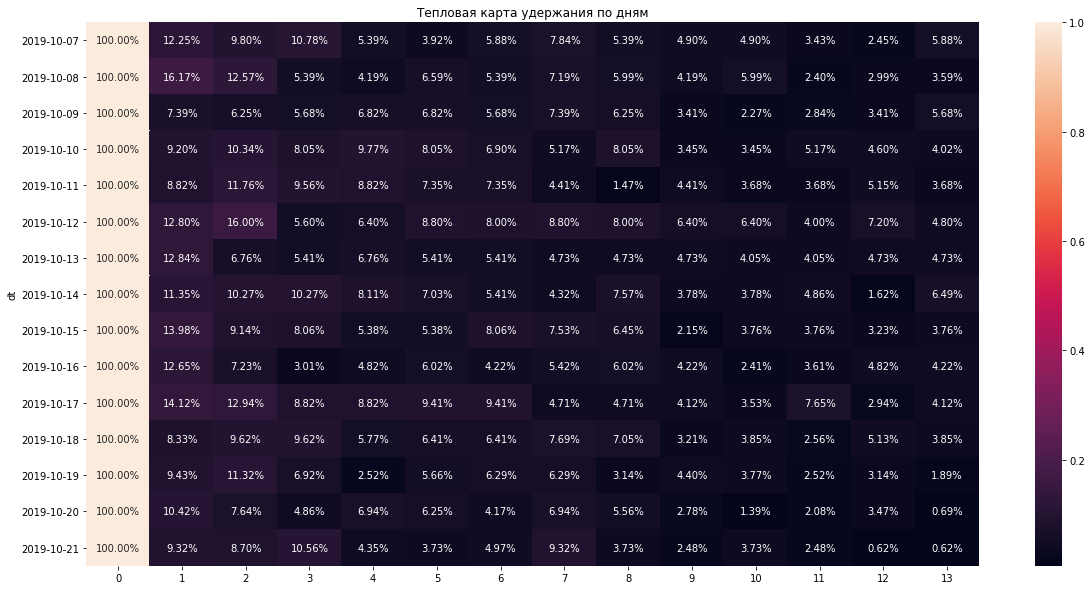

In [63]:
plt.figure(figsize=(20, 10))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по дням')  # название графика
plt.show()

In [64]:
report = retention.drop(columns = ['cohort_sizes']).T

report

dt  2019-10-07  2019-10-08  2019-10-09  2019-10-10  2019-10-11  2019-10-12  \
0     1.000000    1.000000    1.000000    1.000000    1.000000       1.000   
1     0.122549    0.161677    0.073864    0.091954    0.088235       0.128   
2     0.098039    0.125749    0.062500    0.103448    0.117647       0.160   
3     0.107843    0.053892    0.056818    0.080460    0.095588       0.056   
4     0.053922    0.041916    0.068182    0.097701    0.088235       0.064   
5     0.039216    0.065868    0.068182    0.080460    0.073529       0.088   
6     0.058824    0.053892    0.056818    0.068966    0.073529       0.080   
7     0.078431    0.071856    0.073864    0.051724    0.044118       0.088   
8     0.053922    0.059880    0.062500    0.080460    0.014706       0.080   
9     0.049020    0.041916    0.034091    0.034483    0.044118       0.064   
10    0.049020    0.059880    0.022727    0.034483    0.036765       0.064   
11    0.034314    0.023952    0.028409    0.051724    0.036765       0.040   
12    0.024510    0.029940    0.034091    0.045977    0.051471       0.072   
13    0.058824    0.035928    0.056818    0.040230    0.036765       0.048   

dt  2019-10-13  2019-10-14  2019-10-15  2019-10-16  2019-10-17  2019-10-18  \
0     1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1     0.128378    0.113514    0.139785    0.126506    0.141176    0.083333   
2     0.067568    0.102703    0.091398    0.072289    0.129412    0.096154   
3     0.054054    0.102703    0.080645    0.030120    0.088235    0.096154   
4     0.067568    0.081081    0.053763    0.048193    0.088235    0.057692   
5     0.054054    0.070270    0.053763    0.060241    0.094118    0.064103   
6     0.054054    0.054054    0.080645    0.042169    0.094118    0.064103   
7     0.047297    0.043243    0.075269    0.054217    0.047059    0.076923   
8     0.047297    0.075676    0.064516    0.060241    0.047059    0.070513   
9     0.047297    0.037838    0.021505    0.042169    0.041176    0.032051   
10    0.040541    0.037838    0.037634    0.024096    0.035294    0.038462   
11    0.040541    0.048649    0.037634    0.036145    0.076471    0.025641   
12    0.047297    0.016216    0.032258    0.048193    0.029412    0.051282   
13    0.047297    0.064865    0.037634    0.042169    0.041176    0.038462   

dt  2019-10-19  2019-10-20  2019-10-21  
0     1.000000    1.000000    1.000000  
1     0.094340    0.104167    0.093168  
2     0.113208    0.076389    0.086957  
3     0.069182    0.048611    0.105590  
4     0.025157    0.069444    0.043478  
5     0.056604    0.062500    0.037267  
6     0.062893    0.041667    0.049689  
7     0.062893    0.069444    0.093168  
8     0.031447    0.055556    0.037267  
9     0.044025    0.027778    0.024845  
10    0.037736    0.013889    0.037267  
11    0.025157    0.020833    0.024845  
12    0.031447    0.034722    0.006211  
13    0.018868    0.006944    0.006211

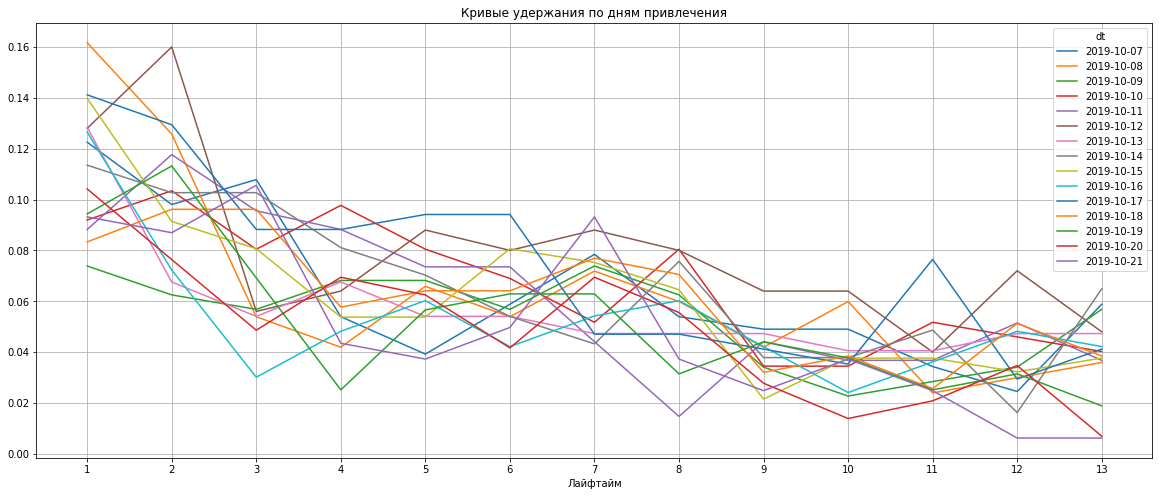

In [65]:
# строим кривые удержания

report = retention.drop(columns = ['cohort_sizes', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(20, 8),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

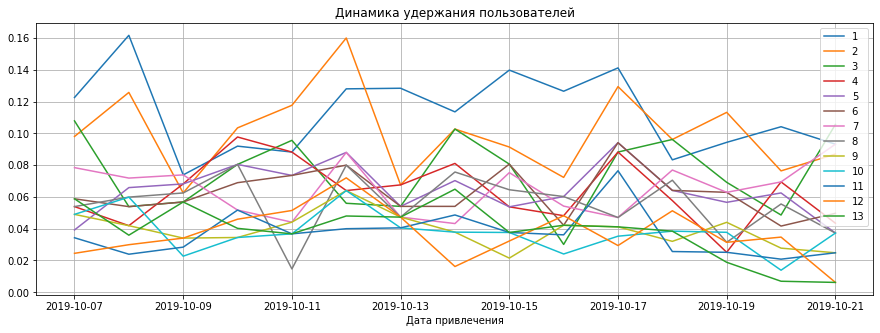

In [66]:
# строим графики изменений

report = retention.drop(columns=['cohort_sizes', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

**Вывод:**
    
   - Retention Rate по дням, показал как падает удержание с каждым днем по кагортам.
   - С каждой новой когортой поведение покупателей меняется.
   - Однако удержание идет волнообразным образом, порой становится выше процент, порой ниже и вновь поднимается. Это говорит о том, что часть пользоватлей возвращается в приложение.
    

#### **Время, проведенное в приложении**

In [67]:
data.head(5)

event_time event_name                               user_id  \
2148 2019-10-07 13:39:46  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2149 2019-10-07 13:40:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2150 2019-10-07 13:41:06  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2151 2019-10-07 13:43:21  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2152 2019-10-07 13:45:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   

     source          event_date    event_dt             diff  diff_sec  \
2148  other 2019-10-07 13:39:46  2019-10-07                0       0.0   
2149  other 2019-10-07 13:40:31  2019-10-07  0 days 00:00:45      45.0   
2150  other 2019-10-07 13:41:06  2019-10-07  0 days 00:00:35      35.0   
2151  other 2019-10-07 13:43:21  2019-10-07  0 days 00:02:15     135.0   
2152  other 2019-10-07 13:45:31  2019-10-07  0 days 00:02:10     130.0   

      session_id  session_per_user  
2148           1                 1  
2149           1                 1  
2150           1                 1  
2151           1                 1  
2152           1                 1

In [68]:
# создаем датафрейм с сессиями
sessions = data.groupby(['user_id', 'event_time', 'session_id', 'event_name', 'source', 'session_per_user']).agg({'event_time':['first', 'last'], 
                                                   'event_name':'count'}).reset_index()
sessions = sessions.set_axis(['user_id', 'event_time', 'session_id', 'event_name', 'source', 'session_per_user', 'session_start', 'session_end', 'events_count'], axis='columns')

# создаем датафрейм для самого первого события у каждого пользователя
user_start = data.groupby('user_id').agg({'event_time':'first'}).reset_index()
user_start.rename(columns={'event_time':'first_visit'}, inplace=True)

# присоединяем к данным о сессиях
sessions = sessions.merge(user_start, on='user_id', how='left')

# вычисляем лайфтайм для каждой сессии в днях
sessions['lifetime'] = (sessions['session_start'] - sessions['first_visit']).dt.days

# длительность сессии - как промежуток между первым и последним событием в сессии
sessions['length'] = sessions['session_end'] - sessions['session_start']

# переведем в секунды
sessions['length_sec'] = sessions['length'].dt.total_seconds()
sessions



user_id          event_time  session_id  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46           1   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31           1   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06           1   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21           1   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31           1   
...                                     ...                 ...         ...   
73074  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:24       10368   
73075  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:58       10368   
73076  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:07:41       10368   
73077  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:18       10368   
73078  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:25       10368   

          event_name  source  session_per_user       session_start  \
0          tips_show   other                 1 2019-10-07 13:39:46   
1          tips_show   other                 1 2019-10-07 13:40:31   
2          tips_show   other                 1 2019-10-07 13:41:06   
3          tips_show   other                 1 2019-10-07 13:43:21   
4          tips_show   other                 1 2019-10-07 13:45:31   
...              ...     ...               ...                 ...   
73074      tips_show  google                30 2019-11-03 15:51:24   
73075  contacts_show  google                30 2019-11-03 15:51:58   
73076      tips_show  google                30 2019-11-03 16:07:41   
73077      tips_show  google                30 2019-11-03 16:08:18   
73078      tips_show  google                30 2019-11-03 16:08:25   

              session_end  events_count         first_visit  lifetime length  \
0     2019-10-07 13:39:46             1 2019-10-07 13:39:46         0 0 days   
1     2019-10-07 13:40:31             1 2019-10-07 13:39:46         0 0 days   
2     2019-10-07 13:41:06             1 2019-10-07 13:39:46         0 0 days   
3     2019-10-07 13:43:21             1 2019-10-07 13:39:46         0 0 days   
4     2019-10-07 13:45:31             1 2019-10-07 13:39:46         0 0 days   
...                   ...           ...                 ...       ...    ...   
73074 2019-11-03 15:51:24             1 2019-10-12 00:57:21        22 0 days   
73075 2019-11-03 15:51:58             1 2019-10-12 00:57:21        22 0 days   
73076 2019-11-03 16:07:41             1 2019-10-12 00:57:21        22 0 days   
73077 2019-11-03 16:08:18             1 2019-10-12 00:57:21        22 0 days   
73078 2019-11-03 16:08:25             1 2019-10-12 00:57:21        22 0 days   

       length_sec  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
73074         0.0  
73075         0.0  
73076         0.0  
73077         0.0  
73078         0.0  

[73079 rows x 13 columns]

##### **Кол-во сессиий в приложении**

In [69]:
sessions['session_per_user'].describe(percentiles=[0.05, 1/4, 1/2, 0.90, 0.95, 0.99])

count    73079.000000
mean         3.591073
std          6.089804
min          1.000000
5%           1.000000
25%          1.000000
50%          2.000000
90%          8.000000
95%         14.000000
99%         29.000000
max         99.000000
Name: session_per_user, dtype: float64

In [70]:
sessions['session_per_user'].median()

2.0

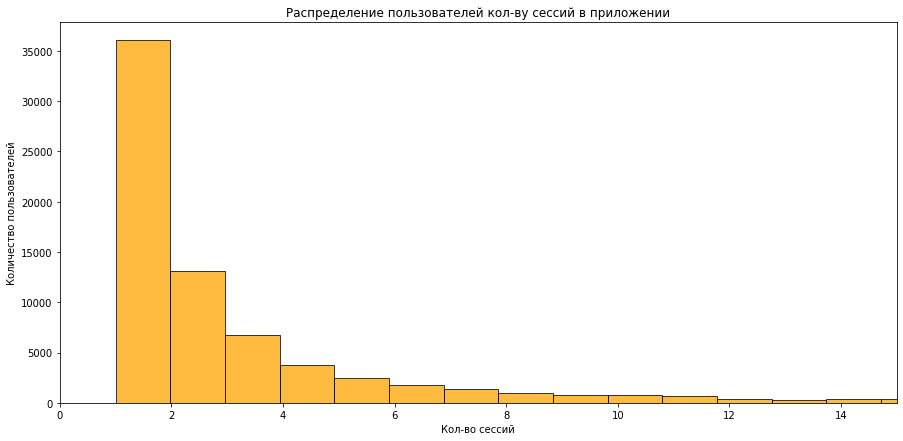

In [71]:
plt.figure(figsize = (15,7))
sns.histplot(x='session_per_user', data=sessions, bins=100, legend=False, color="orange", edgecolor = 'black')
plt.xlabel('Кол-во сессий')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей кол-ву сессий в приложении')
plt.xlim(0, 15)
plt.show()

**Вывод:**

- медианное значение кол-ва сессий на пользователя - 2.
- среднее кол-во сессий на пользователя - 4.3.
- будем ориентироваться на медианные значения.


##### **Профиль пользователя и время в приложении**

In [72]:
# составим профили пользователей
users_profiles = sessions.groupby(['user_id',  'source', 'session_start', 'first_visit', 'lifetime']).agg({'session_per_user': 'max', 
                                                  'length_sec':'mean', 
                                                  'events_count':'mean'}).reset_index()
users_profiles = users_profiles.merge(mobile_sources, on='user_id', how='left')

# для каждого из событий составим столбец с признаком
for event in list(data['event_name'].unique()):
    event_users = list(data[data['event_name'] == event]['user_id'].unique())
    users_profiles[event] = 0
    for user in event_users:
        users_profiles.loc[users_profiles['user_id'] == user, event] = 1

users_profiles

user_id source_x       session_start  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349    other 2019-10-07 13:39:46   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349    other 2019-10-07 13:40:31   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349    other 2019-10-07 13:41:06   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349    other 2019-10-07 13:43:21   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349    other 2019-10-07 13:45:31   
...                                     ...      ...                 ...   
72935  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   google 2019-11-03 15:51:24   
72936  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   google 2019-11-03 15:51:58   
72937  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   google 2019-11-03 16:07:41   
72938  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   google 2019-11-03 16:08:18   
72939  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   google 2019-11-03 16:08:25   

              first_visit  lifetime  session_per_user  length_sec  \
0     2019-10-07 13:39:46         0                 1         0.0   
1     2019-10-07 13:39:46         0                 1         0.0   
2     2019-10-07 13:39:46         0                 1         0.0   
3     2019-10-07 13:39:46         0                 1         0.0   
4     2019-10-07 13:39:46         0                 1         0.0   
...                   ...       ...               ...         ...   
72935 2019-10-12 00:57:21        22                30         0.0   
72936 2019-10-12 00:57:21        22                30         0.0   
72937 2019-10-12 00:57:21        22                30         0.0   
72938 2019-10-12 00:57:21        22                30         0.0   
72939 2019-10-12 00:57:21        22                30         0.0   

       events_count source_y  tips_show  map  search  photos_show  \
0                 1    other          1    1       0            0   
1                 1    other          1    1       0            0   
2                 1    other          1    1       0            0   
3                 1    other          1    1       0            0   
4                 1    other          1    1       0            0   
...             ...      ...        ...  ...     ...          ...   
72935             1   google          1    1       0            0   
72936             1   google          1    1       0            0   
72937             1   google          1    1       0            0   
72938             1   google          1    1       0            0   
72939             1   google          1    1       0            0   

       favorites_add  contacts_show  contacts_call  advert_open  tips_click  
0                  0              0              0            0           0  
1                  0              0              0            0           0  
2                  0              0              0            0           0  
3                  0              0              0            0           0  
4                  0              0              0            0           0  
...              ...            ...            ...          ...         ...  
72935              0              1              0            0           0  
72936              0              1              0            0           0  
72937              0              1              0            0           0  
72938              0              1              0            0           0  
72939              0              1              0            0           0  

[72940 rows x 18 columns]

In [73]:
print('\nЧисло дубликатов:', users_profiles.duplicated().sum())


Число дубликатов: 0


In [74]:
display(users_profiles.describe(percentiles=[0.05, 1/4, 1/2, 0.90, 0.95, 0.99]))

lifetime  session_per_user  length_sec  events_count     tips_show  \
count  72940.000000      72940.000000     72940.0       72940.0  72940.000000   
mean       2.648382          3.591815         0.0           1.0      0.764766   
std        5.043527          6.092635         0.0           0.0      0.424148   
min        0.000000          1.000000         0.0           1.0      0.000000   
5%         0.000000          1.000000         0.0           1.0      0.000000   
25%        0.000000          1.000000         0.0           1.0      1.000000   
50%        0.000000          2.000000         0.0           1.0      1.000000   
90%       10.000000          8.000000         0.0           1.0      1.000000   
95%       14.000000         14.000000         0.0           1.0      1.000000   
99%       22.000000         29.000000         0.0           1.0      1.000000   
max       26.000000         99.000000         0.0           1.0      1.000000   

                map        search   photos_show  favorites_add  contacts_show  \
count  72940.000000  72940.000000  72940.000000   72940.000000   72940.000000   
mean       0.511708      0.453743      0.205950       0.158294       0.363861   
std        0.499866      0.497859      0.404397       0.365019       0.481113   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
5%         0.000000      0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000      0.000000       0.000000       0.000000   
50%        1.000000      0.000000      0.000000       0.000000       0.000000   
90%        1.000000      1.000000      1.000000       1.000000       1.000000   
95%        1.000000      1.000000      1.000000       1.000000       1.000000   
99%        1.000000      1.000000      1.000000       1.000000       1.000000   
max        1.000000      1.000000      1.000000       1.000000       1.000000   

       contacts_call   advert_open    tips_click  
count   72940.000000  72940.000000  72940.000000  
mean        0.053674      0.323101      0.170140  
std         0.225375      0.467664      0.375758  
min         0.000000      0.000000      0.000000  
5%          0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000  
50%         0.000000      0.000000      0.000000  
90%         0.000000      1.000000      1.000000  
95%         1.000000      1.000000      1.000000  
99%         1.000000      1.000000      1.000000  
max         1.000000      1.000000      1.000000

In [75]:
users_profiles['events_count'].median()

1.0

In [76]:
sessions['length'].describe(percentiles=[0.05, 1/4, 1/2, 0.90, 0.95, 0.99])

count              73079
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
5%       0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
90%      0 days 00:00:00
95%      0 days 00:00:00
99%      0 days 00:00:00
max      0 days 00:00:00
Name: length, dtype: object

In [77]:
sessions['length_sec'].describe(percentiles=[0.05, 1/4, 1/2, 0.90, 0.95, 0.99])

count    73079.0
mean         0.0
std          0.0
min          0.0
5%           0.0
25%          0.0
50%          0.0
90%          0.0
95%          0.0
99%          0.0
max          0.0
Name: length_sec, dtype: float64

In [78]:
sessions['length'].median()

Timedelta('0 days 00:00:00')

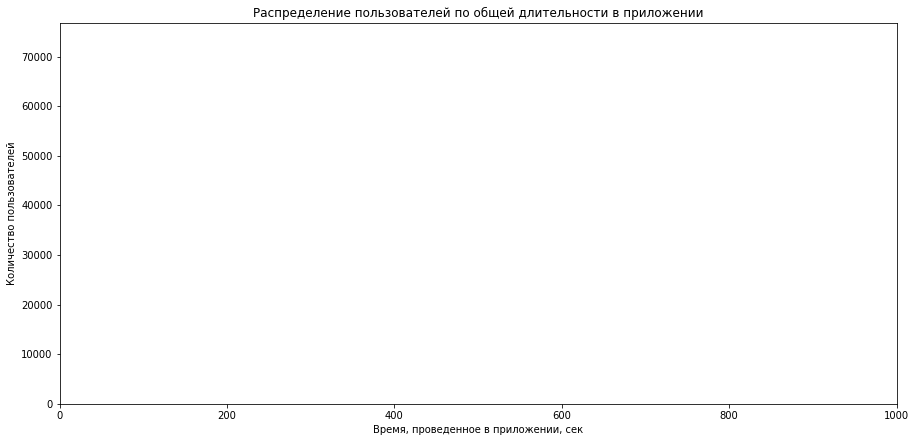

In [79]:
plt.figure(figsize = (15,7))
sns.histplot(x='length_sec', data=sessions, bins=1000, legend=False, color="orange", edgecolor = 'black')
plt.xlabel('Время, проведенное в приложении, сек')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по общей длительности в приложении')
plt.xlim(0, 1000)
plt.show()

**Вывод:**
- по профилю пользователя видно, что кол-во событий на пользователя в среднем 8.
- кол-во событий по медиане - 5.75
- средняя продолжительность сессии на пользователя 12 минут, однако 50% пользователей имеют сессию только в пять минут
- медианная продолжительность сессии на пользователя - 0 days 00:05:27.

##### **Распределение пользователей по целевому действию - просмотр контактов**

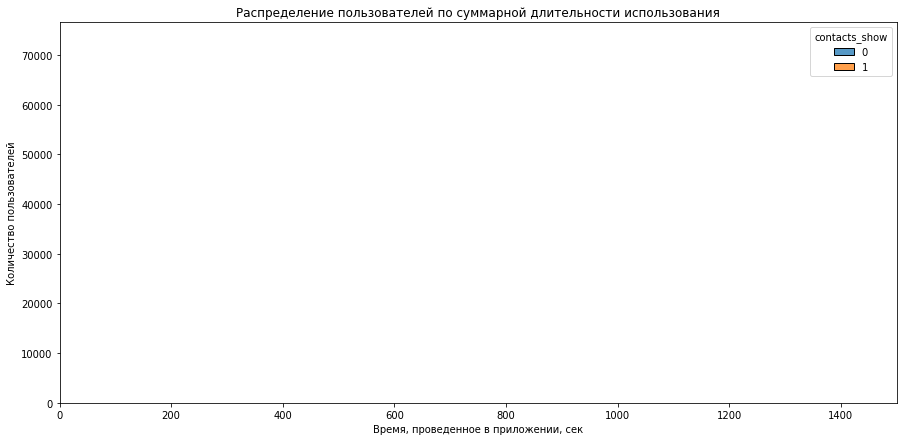

In [80]:
plt.figure(figsize = (15,7))
sns.histplot(x='length_sec', data=users_profiles, hue= 'contacts_show', multiple='stack', bins=590, edgecolor = 'black')
plt.xlabel('Время, проведенное в приложении, сек')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по суммарной длительности использования')
plt.xlim(0, 1500)
plt.show()

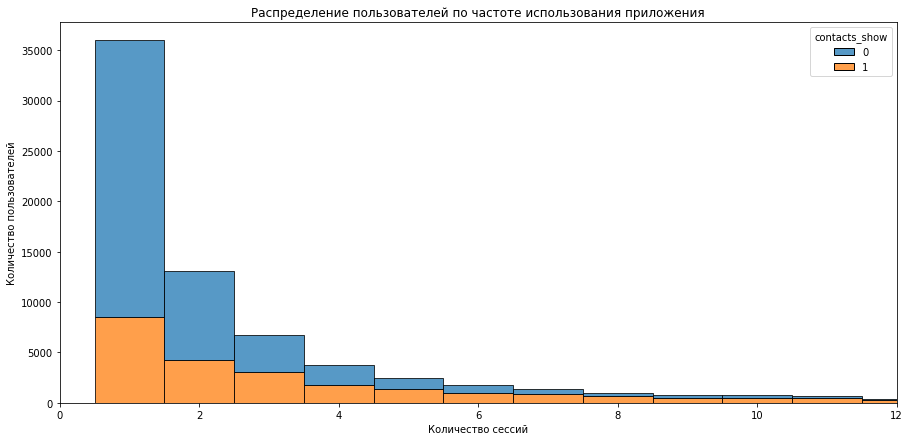

In [81]:
plt.figure(figsize = (15,7))
sns.histplot(x='session_per_user', data=users_profiles, hue='contacts_show', multiple='stack', discrete=True, edgecolor = 'black')
plt.xlabel('Количество сессий')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по частоте использования приложения')
plt.xlim(0, 12)
plt.show()

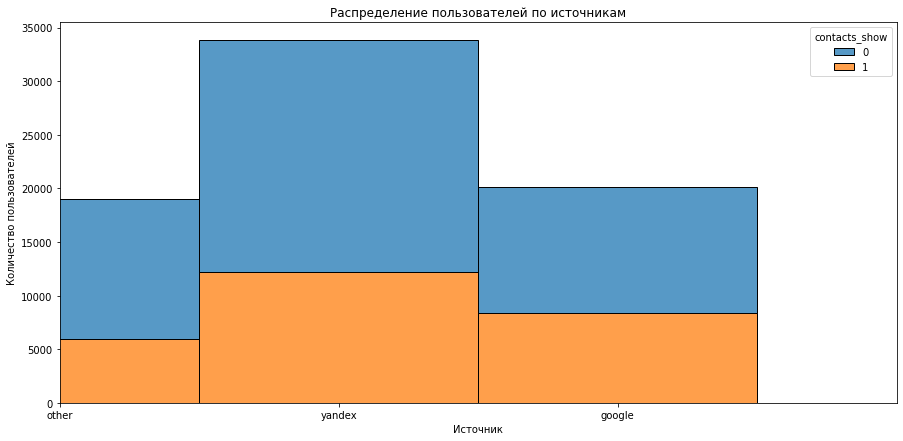

In [82]:
plt.figure(figsize = (15,7))
sns.histplot(x='source_x', data=users_profiles, bins=1000, hue='contacts_show', multiple='stack', discrete=True, edgecolor = 'black')
plt.xlabel('Источник')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по источникам')
plt.xlim(0, 3)
plt.show()

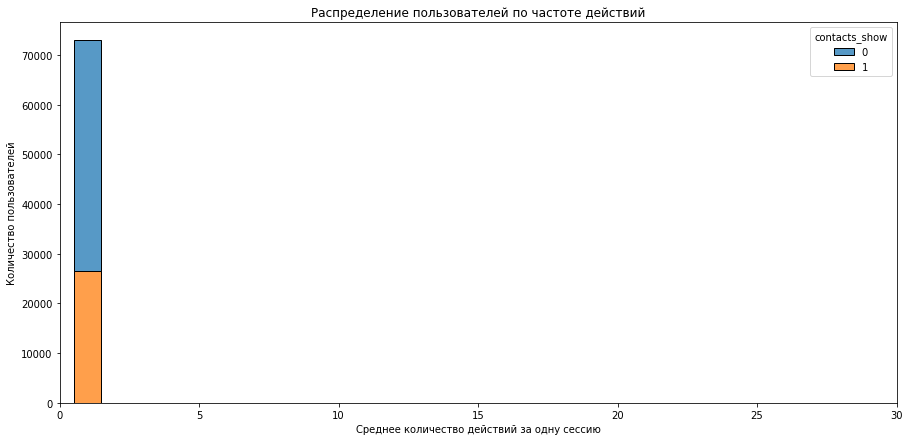

In [83]:
plt.figure(figsize = (15,7))
sns.histplot(x='events_count', data=users_profiles, hue='contacts_show', multiple='stack', discrete=True, edgecolor = 'black')
plt.xlabel('Среднее количество действий за одну сессию')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по частоте действий')
plt.xlim(0, 30)
plt.show()

**Вывод:**

- Кол-во пользователей с цд намного меньше, по сравнению с теми кто не совершил действие.
- Продолжительность нахождения в приложении у тех кто совершил ЦД и тех кто не совершил распределена равномерно.
- Также из графика видно, что частота посещения приложения также одинаково распределена у этих двух групп
- А также что пользователи из всех источников совершают цд.


In [84]:
users_profiles = pd.get_dummies(users_profiles, columns=['source_x'])

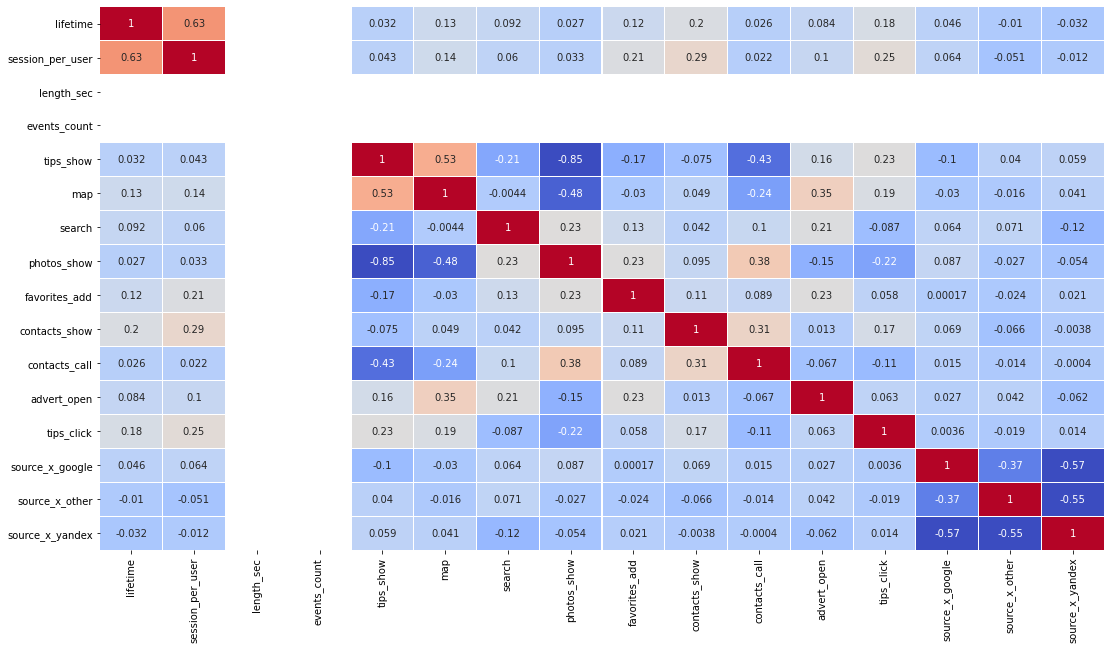

In [85]:
# матрица корреляций
plt.figure(figsize=(18, 10))
sns.heatmap(users_profiles.corr(), annot=True, cmap='coolwarm', cbar=False, robust=True, linewidths=.2)
plt.show()

**Вывод:**

прослеживается сильная корреляция между: 

    - количеством событий и продолжительностью сессии
    - а также цд - contact_show и contact_call
    - между событием map и tips_show
    - между map и advert_open
    Эти корееляции можно будет задействовать в воронке по достижению целевого действия - посещение контактов.
        

#### **Частота действий**

In [86]:
#рассмотрим вначале все события в приложении
all_events = data['event_name'].value_counts().to_frame()
all_events

event_name
tips_show           39892
photos_show          9372
search               6766
advert_open          6145
contacts_show        4381
map                  3760
favorites_add        1414
tips_click            811
contacts_call         538

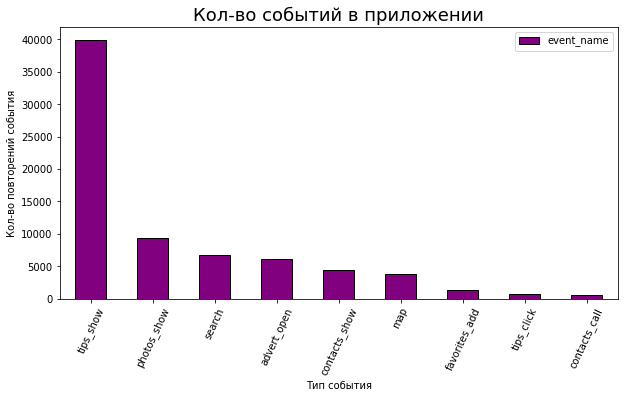

In [87]:
all_events.plot(kind='bar', figsize=(10,5), color='purple', edgecolor = 'black')
plt.title('Кол-во событий в приложении', fontsize=18)
plt.gca().set(xlabel='Тип события', ylabel='Кол-во повторений события')
plt.xticks(rotation=65)
plt;

Самое популярное событие tips_show - показов 39892, далее photos_show - кликов 9372, search - 6766 поисков по приложению, advert_open- 6145 кликов по рекламе, 
contacts_show - 4381 просмотрт контактов.

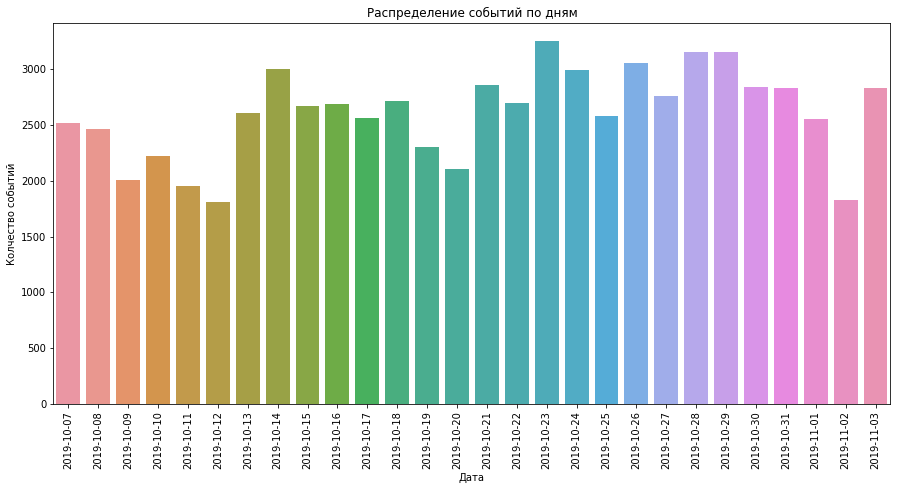

In [88]:
#посмотрим как  эти события по дням распределяются
events_dates = data.groupby('event_dt')[['event_name']].count().reset_index()
#data['event_date'] = pd.to_datetime(data['event_date'], format='%Y.%m.%d')

plt.figure(figsize = (15,7))
sns.barplot(x='event_dt', y='event_name', data=events_dates)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Колчество событий')
plt.title('Распределение событий по дням')
plt.show()

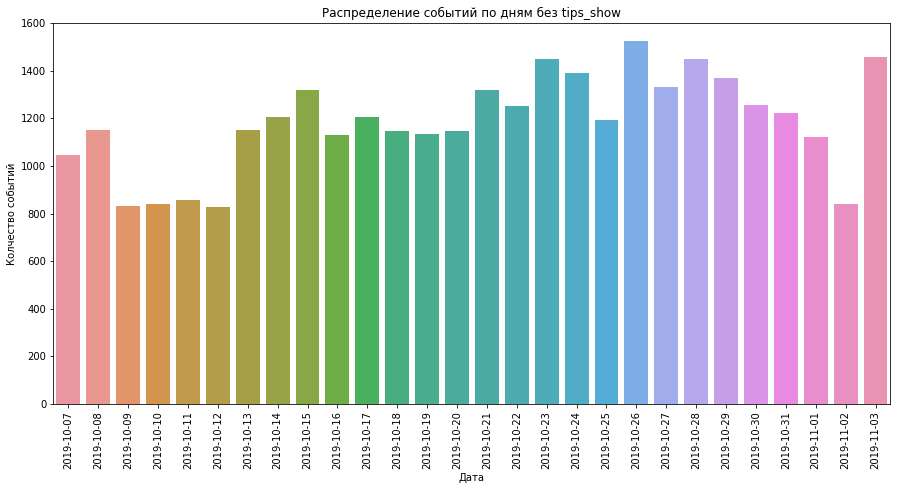

In [89]:
#посмотрим арспредление без показа tip_show, так как это пользователям показывается, а они сами не предпринимабт для этого действия
new_data =data.query('event_name !="tips_show"')

events_dates_new = new_data.groupby('event_dt')[['event_name']].count().reset_index()

plt.figure(figsize = (15,7))
sns.barplot(x='event_dt', y='event_name', data=events_dates_new)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Колчество событий')
# plt.grid()
plt.title('Распределение событий по дням без tips_show')
plt.show()

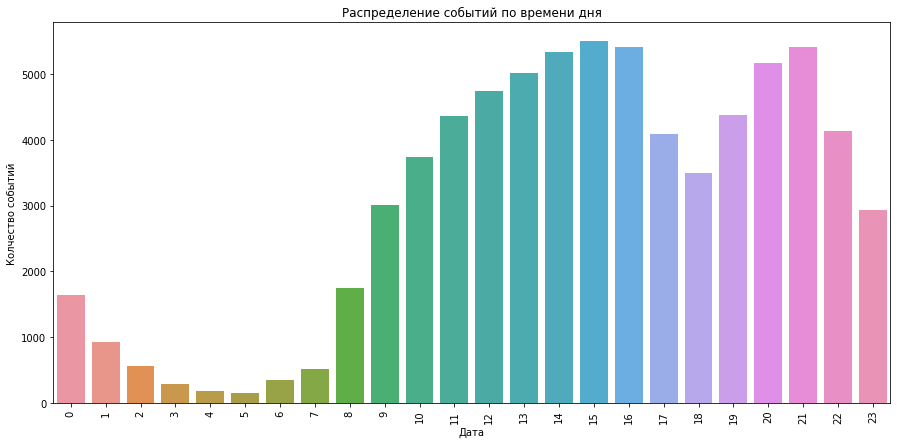

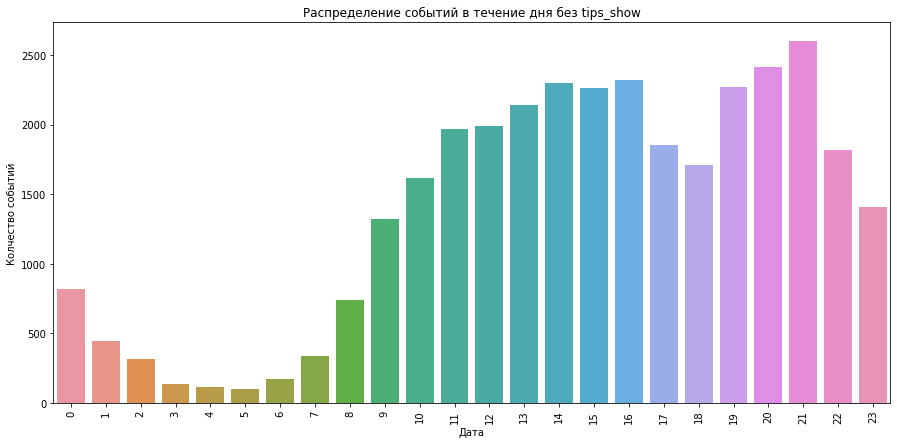

In [90]:
data['event_hour'] = data['event_time'].dt.hour
events_dates = data.groupby('event_hour')[['event_name']].count().reset_index()

plt.figure(figsize = (15,7))
sns.barplot(x='event_hour', y='event_name', data=events_dates)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Колчество событий')
plt.title('Распределение событий по времени дня')
plt.show()

new_data =data.query('event_name !="tips_show"')
events_dates_new = new_data.groupby('event_hour')[['event_name']].count().reset_index()

plt.figure(figsize = (15,7))
sns.barplot(x='event_hour', y='event_name', data=events_dates_new)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Колчество событий')
# plt.grid()
plt.title('Распределение событий в течение дня без tips_show')
plt.show()

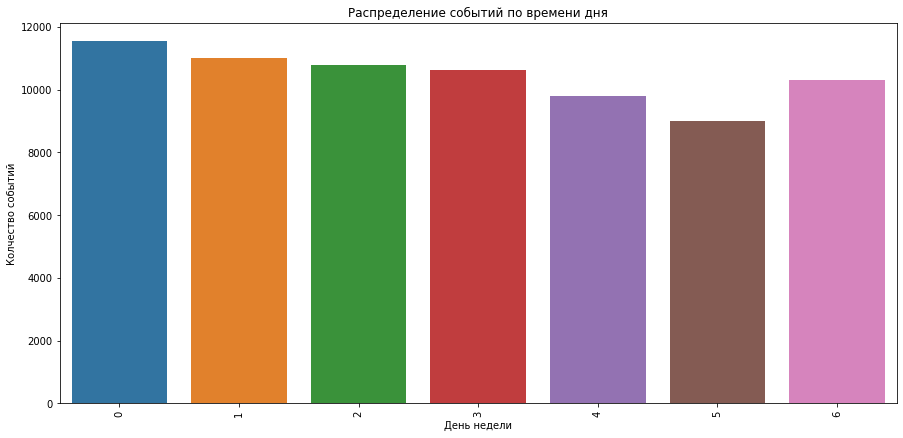

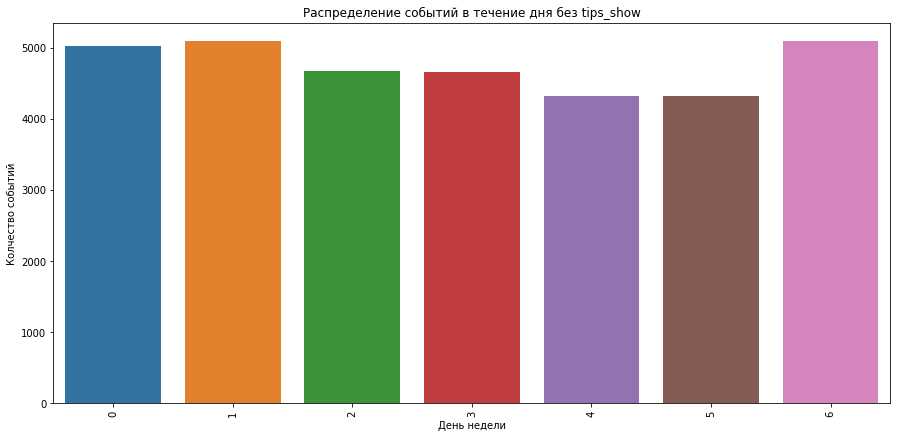

In [91]:
data['event_weekday'] = data['event_time'].dt.weekday
events_dates = data.groupby('event_weekday')[['event_name']].count().reset_index()

plt.figure(figsize = (15,7))
sns.barplot(x='event_weekday', y='event_name', data=events_dates)
plt.xticks(rotation=90)
plt.xlabel('День недели')
plt.ylabel('Колчество событий')
plt.title('Распределение событий по времени дня')
plt.show()

new_data =data.query('event_name !="tips_show"')
events_dates_new = new_data.groupby('event_weekday')[['event_name']].count().reset_index()

plt.figure(figsize = (15,7))
sns.barplot(x='event_weekday', y='event_name', data=events_dates_new)
plt.xticks(rotation=90)
plt.xlabel('День недели')
plt.ylabel('Колчество событий')
# plt.grid()
plt.title('Распределение событий в течение дня без tips_show')
plt.show()

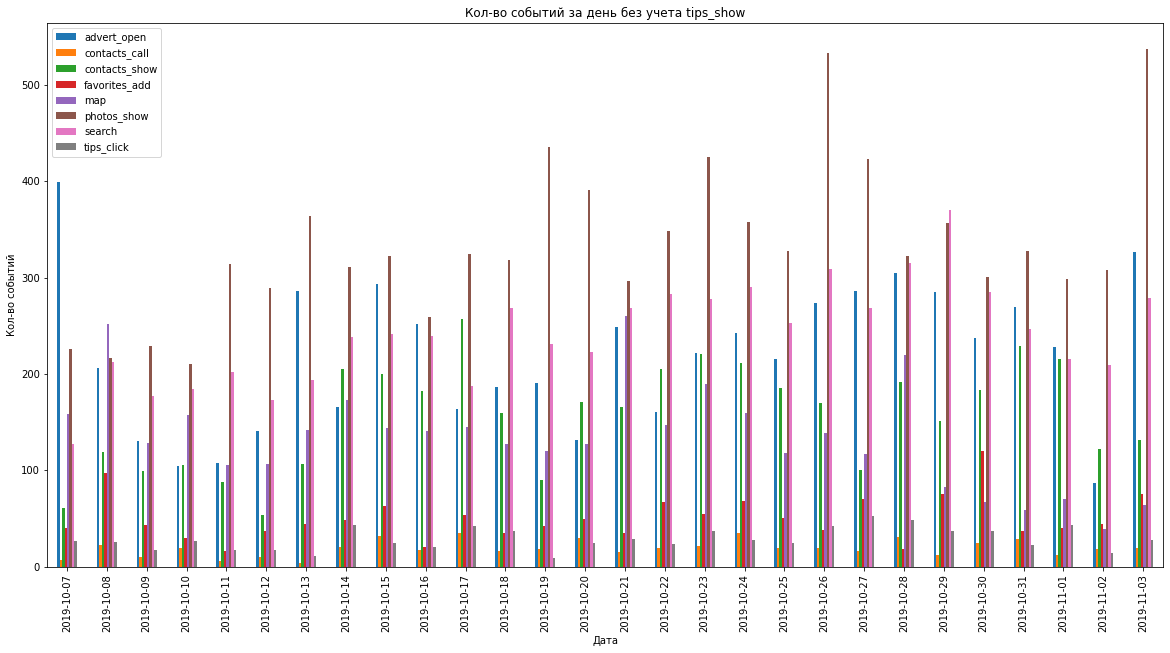

In [92]:
data.query('event_name !="tips_show"').pivot_table(index='event_dt', columns='event_name', values='event_time', aggfunc='count').plot(kind='bar',grid=False, figsize=(20, 10))
plt.title('Кол-во событий за день без учета tips_show')
plt.xlabel("Дата")
plt.ylabel("Кол-во событий")
plt.legend();

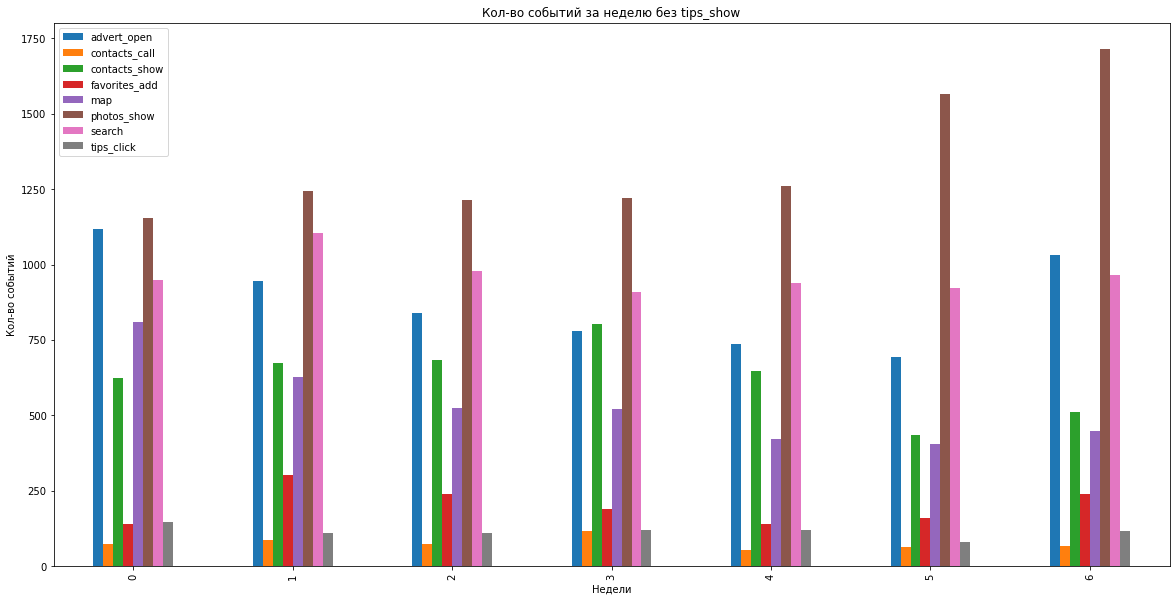

In [93]:
data.query('event_name !="tips_show"').pivot_table(index='event_weekday', columns='event_name', values='event_time', aggfunc='count').plot(kind='bar',grid=False, figsize=(20, 10))
plt.title('Кол-во событий за неделю без tips_show')
plt.xlabel("Недели")
plt.ylabel("Кол-во событий")
plt.legend();

**Вывод:**

- Распределение событий по дням происходит волнообразно, видна единая тенденция по возрастанию и убыванию событий.
- По дневному времени видно, что большинство событий случается с 10.00 до 22.00. Пик активности приходится на временной промежуток с 14.00 до 16.00.
- Распределение событий по дням неделям показывает меньшую активность в пятницу-субботу, и самую высокую активность в воскресенья по вторник.
- Распредление событий по дням показало, что исключив из данных tips_show, большая автиность на 7 день по photos_show и advert_open. Меньше всего открывают рекламу по пятницам-субботам. Активно ищут информация вначале недели  в приложении. А просмотр контактов к выходным падает.


#### **Конверсия в целевое действие — просмотр контактов**

In [94]:
#Сколько всего пользователей?
print('Всего: {} пользователей.'.format(data['user_id'].nunique()))

Всего: 4293 пользователей.


In [95]:
#количество уникальных пользователей
a=data['user_id'].nunique()
a

4293

In [96]:
# переменная с фильтром пользователей по совешившим целевое действие - contacts_show
users_contacts_show = data.query('event_name =="contacts_show"')['user_id'].unique()
b= len(users_contacts_show)
b

981

In [97]:
print('Конверсия в просмотр контактов: {}.'. format(b/a*100))


Конверсия в просмотр контактов: 22.851153039832283.


In [98]:
contact_show_users = data.query('event_name == "contacts_show"').groupby('user_id')['event_name'].count().sort_values(ascending=False)
contact_show_users.describe()

count    981.000000
mean       4.465851
std        8.982642
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      137.000000
Name: event_name, dtype: float64

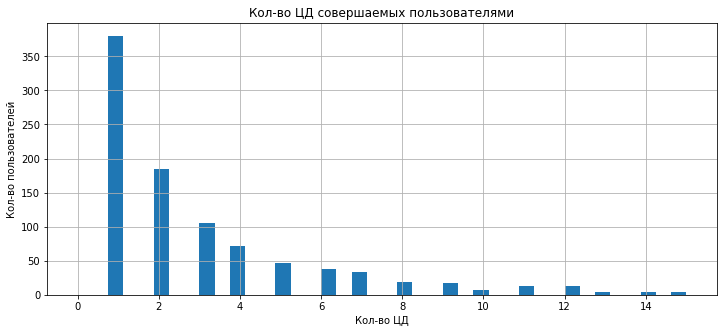

In [99]:
contact_show_users.hist(figsize=(12,5), bins=40, range=(0,15))
plt.title('Кол-во ЦД совершаемых пользователями')
plt.ylabel('Кол-во пользователей');
plt.xlabel('Кол-во ЦД');
plt.show()


**Вывод:**

    - целевое действие в приложении выполнялось всего 981 раз.
    - минимальное значение -1 раз.
    - максимальне  значение - 137 раз.
    - в среднем кол-во достижений ЦД на пользователя- 4 раза.
    - медианное значение 2 раза.
    - конверсия в цд составляет 22%

#### **Воронка по возможным взаимодействиям с приложением**

In [100]:
users = data.pivot_table(index=['user_id', 'event_dt'], 
                         columns='event_name', 
                         values='event_time',
                         aggfunc='min')
users

event_name                                      advert_open contacts_call  \
user_id                              event_dt                               
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07         NaT           NaT   
                                     2019-10-09         NaT           NaT   
                                     2019-10-21         NaT           NaT   
                                     2019-10-22         NaT           NaT   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19         NaT           NaT   
...                                                     ...           ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29         NaT           NaT   
                                     2019-10-30         NaT           NaT   
                                     2019-11-01         NaT           NaT   
                                     2019-11-02         NaT           NaT   
                                     2019-11-03         NaT           NaT   

event_name                                            contacts_show  \
user_id                              event_dt                         
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07                 NaT   
                                     2019-10-09                 NaT   
                                     2019-10-21                 NaT   
                                     2019-10-22                 NaT   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19                 NaT   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29 2019-10-29 14:00:14   
                                     2019-10-30 2019-10-30 00:15:43   
                                     2019-11-01                 NaT   
                                     2019-11-02 2019-11-02 18:17:41   
                                     2019-11-03 2019-11-03 14:33:48   

event_name                                      favorites_add  \
user_id                              event_dt                   
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07           NaT   
                                     2019-10-09           NaT   
                                     2019-10-21           NaT   
                                     2019-10-22           NaT   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19           NaT   
...                                                       ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29           NaT   
                                     2019-10-30           NaT   
                                     2019-11-01           NaT   
                                     2019-11-02           NaT   
                                     2019-11-03           NaT   

event_name                                                      map  \
user_id                              event_dt                         
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07                 NaT   
                                     2019-10-09 2019-10-09 18:33:56   
                                     2019-10-21 2019-10-21 19:53:39   
                                     2019-10-22 2019-10-22 11:18:15   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19                 NaT   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29                 NaT   
                                     2019-10-30                 NaT   
                                     2019-11-01                 NaT   
                                     2019-11-02                 NaT   
                                     2019-11-03                 NaT   

event_name                                              photos_show  \
user_id                              event_dt                         
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07                 NaT   
                                     2019-10-09                 NaT   
                    

In [101]:
funnel = data.groupby('session_id').agg({'event_name': 'unique'})
funnel

event_name
session_id                            
1                          [tips_show]
2                     [map, tips_show]
3                     [tips_show, map]
4                     [map, tips_show]
5                [search, photos_show]
...                                ...
10364                      [tips_show]
10365       [tips_show, contacts_show]
10366       [tips_show, contacts_show]
10367       [tips_show, contacts_show]
10368       [tips_show, contacts_show]

[10368 rows x 1 columns]

In [102]:
def funnels(step1, step2, step3):
  step_1 = ~users[step1].isna()
  step_2 = step_1 & (users[step2] > users[step1])
  step_3 = step_2 & (users[step3] > users[step2])
    
  title=str('"<b>Воронка событий: ' + step1 + ' - ' + step2 + ' - ' + step3 + '</b>"')

  n_1 = users[step_1].shape[0]
  n_2 = users[step_2].shape[0]
  n_3 = users[step_3].shape[0]
 

  fig = go.Figure(go.Funnel(
    y = [step1, step2, step3],
    x = [n_1, n_2, n_3],
    textposition = "auto",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )
  fig.update_layout(title=str('"<b>Воронка событий: ' + step1 + ' - ' + step2 + ' - ' + step3 + '</b>"'))
  fig.show()

In [103]:
#возьмем варианты воронок из корреляции по событиям и данным, ранее полученным

In [104]:
funnels('tips_show', 'tips_click', 'contacts_show')

In [105]:
funnels('search', 'tips_show', 'contacts_show')

In [106]:
funnels('map', 'tips_show', 'contacts_show')

In [107]:
funnels('search', 'contacts_show', 'contacts_call')

**Вывод:**
- Самый лучший процент достижения ЦД в 8 процентов показала третя воронка с путем - 'map', 'tips_show', 'contacts_show'.
После открытия карты с объявлениями 8 процентов доходят до просмотра контактов.
- Также хорошо рекомендует себя поиск по приложению. По пути 'search', 'contacts_show', 'contacts_call', с поиска на просмотр контактов переходит 13 % пользователей. И эти пользователи коневртируются в звонки в соотношении 3 процентов.
- 7% пользователей кликают на предложенные ему предложения - путь 'tips_show', 'tips_click', 'contacts_show', однако возможно предложения не совсем релеванты, потому что переходят в контакт только 1% от всех польователей.



#### **Выводы по поведению пользователя**

**Период и данные:**

•	Данные по рассматриваемому периоду представлены в полном объеме - пользователи активно заходили и выполняли действия в приложении на протяжении всего времени.
•	Распределение пользователей по дням и кол-во событий по дням достаточно равномерно. 
•	В среднем сессия пользователя длится 23 минуты = 1400 сек. В работе учли таймаут в 30 минут для разделений сессий по пользователям.

**События:**

•	Распределение событий по дням происходит волнообразно, видна единая тенденция по возрастанию и убыванию событий.
•	Большинство событий случается с 10.00 до 22.00. Пик активности приходится на временной промежуток с 14.00 до 16.00.
•	Распределение событий по дням неделям показывает меньшую активность в пятницу-субботу, и самую высокую активность в воскресенья по вторник.
•	Распределение событий по дням показало, что исключив из данных tips_show, большая активность на 7 день по photos_show и advert_open. Меньше всего открывают рекламу по пятницам-субботам. Активно ищут информация вначале недели в приложении. А просмотр контактов к выходным падает.
•	Самое популярное событие tips_show - показов 39892, далее photos_show - кликов 9372, search - 6766 поисков по приложению, advert_open- 6145 кликов по рекламе, contacts_show - 4381 просмотр контактов.
	
**Целевое действие – просмотр контактов:**

•	Целевое действие в приложении выполнялось всего 981 раз.
•	Минимальное значение -1 раз.
•	Максимальное  значение - 137 раз.
•	В среднем кол-во достижений ЦД на пользователя- 4 раза, а медианное значение 2 раза.
•	Конверсия в ЦД составляет 22%

**Воронки взаимодействия с приложением:**
•	Самый лучший процент достижения ЦД в 8 процентов показала воронка с путем - 'map', 'tips_show', 'contacts_show'. После открытия карты с объявлениями 8 процентов доходят до просмотра контактов. 
•	Также хорошо рекомендует себя поиск по приложению. По пути 'search', 'contacts_show', 'contacts_call', с поиска на просмотр контактов переходит 13 % пользователей. И эти пользователи конвертируются в звонки в соотношении 3 процентов.
•	 7% пользователей кликают на предложенные ему предложения - путь 'tips_show', 'tips_click', 'contacts_show', однако возможно предложения не релеванты, потому что переходят в контакт только 1% от всех пользователей.
•	Продолжительность нахождения в приложении у тех, кто совершил ЦД и тех кто не совершил распределена равномерно.
•	Пользователи из всех источников совершают ЦД.

**Пользователи:**
•	Всего уникальных пользователей: 4293. 66 пользователей совершили всего одно действие, среднее количество действий - 17, медианное - 9, есть те, кто совершил и более 58 действий. 
•	Среднее количество действий - 9, медианное - 5, всего более 10% сделали 19 действий с приложением. В основном пользователи делают 19 взаимодействий с приложением, есть выбросы до 333 взаимодействий.
•	Распределение пользователей по дням и кол-во событий по дням достаточно равномерно. 

**Удержание пользователей:**

•	Retention Rate по дням, показал, что удержание падает с каждым днем по кагортам.
•	Однако удержание идет волнообразным образом, порой становится выше процент, порой ниже и вновь поднимается. Это говорит о том, что часть пользователей возвращается в приложение.

**Сессии:** 

•	Были рассчитаны медианное значение кол-ва сессий на пользователя – 2 и среднее кол-во сессий на пользователя - 4.3. Ориентир берем на медианное значение.


### **Шаг 4. Сегментация пользователей (расчет коэффициентов конверсии в ЦД и удержания)**

**Шаг 4. Сегментация пользователей на 3-4 группы (по 1 или двум признакам)**
    
- Для каждой группы рассчитываем Retention rate 
- Для каждой группы рассчитываем конверсию в целевое действие



#### **Выбор групп для сегментации**

Выберем группы пользователей для сегментации по частоте использования приложения и достижению целевого действия:
для этого будем использовать кластеризацию.



**Выберем группы**:

    - пользоватлей, которые просмотривали contact_show
    - пользователи, которые не просматривали contact_show
    - пользоватлей, которые просмотривали photos_show
    - пользователи, которые не просматривали photos_show
    - пользователи, которые пользовались search
    - пользователи, которые не пользовались search
    

 
- Выбор данных груп основан на ранее проведенном анализе по взаимодействию пользователей по воронке продаж, как они конвертируются в ЦД ,а также на основе анализа событий, которые чаще всего приводят к ЦД.
- Хорошую конвертируемость в ЦД показал пусть 'search', 'contacts_show', 'contacts_call', поэтому захотела проанализировать как те кто прошел этому пути и кто не прошел отличаются друг от друга -каково их поведение.
- Также само ЦД это просмотр контактов, здесь важно понимать, кто эти люди, которые совершают действие, а кто не совершают, почему их так много и что ими движет не совершать действие - возможно здесь найти именно то, что поможет доработать приложение и сконвертировать этих пользователей в ЦД.
- Также при анализе данных по действиям пользователей сайта было увидено, что очень часто пользователи вначале смотрят фотографии, а потом совершают ЦД. Поэтому и их рассмотрим в рамках данного анализа.


In [111]:
# для каждого из событий составим столбец с признаком
for event in list(data['event_name'].unique()):
    event_users = list(data[data['event_name'] == event]['user_id'].unique())
    sessions_rr[event] = 0
    for user in event_users:
        sessions_rr.loc[sessions_rr['user_id'] == user, event] = 1
        
# для каждого из событий составим столбец с признаком
for event in list(data['event_name'].unique()):
    event_users = list(data[data['event_name'] == event]['user_id'].unique())
    profiles[event] = 0
    for user in event_users:
        profiles.loc[profiles['user_id'] == user, event] = 1

In [112]:
profiles

user_id            first_ts  \
0     0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46   
1     00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:34   
2     00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35   
3     004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:06   
4     00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41   
...                                    ...                 ...   
4288  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13 16:11:27   
4289  ffc01466-fdb1-4460-ae94-e800f52eb136 2019-10-07 20:32:50   
4290  ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23 11:51:35   
4291  ffe68f10-e48e-470e-be9b-eeb93128ff1a 2019-10-21 16:39:34   
4292  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-12 00:57:21   

              first_data    first_event  source  tips_show  map  search  \
0    2019-10-07 13:39:46      tips_show   other          1    1       0   
1    2019-10-19 21:34:34         search  yandex          0    0       1   
2    2019-11-01 13:54:35    photos_show  yandex          0    0       0   
3    2019-10-18 22:14:06         search  google          1    1       1   
4    2019-10-25 16:44:41  contacts_show  yandex          0    0       1   
...                  ...            ...     ...        ...  ...     ...   
4288 2019-10-13 16:11:27            map  yandex          1    1       0   
4289 2019-10-07 20:32:50    photos_show  yandex          0    0       0   
4290 2019-10-23 11:51:35      tips_show  google          1    1       0   
4291 2019-10-21 16:39:34         search  yandex          0    0       1   
4292 2019-10-12 00:57:21      tips_show  google          1    1       0   

      photos_show  favorites_add  contacts_show  contacts_call  advert_open  \
0               0              0              0              0            0   
1               1              1              1              1            1   
2               1              0              0              0            0   
3               0              0              0              0            1   
4               1              0              1              1            0   
...           ...            ...            ...            ...          ...   
4288            0              0              0              0            0   
4289            1              0              1              0            0   
4290            0              0              0              0            0   
4291            1              0              1              0            0   
4292            0              0              1              0            0   

      tips_click  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
4288           0  
4289           0  
4290           0  
4291           0  
4292           0  

[4293 rows x 14 columns]

In [113]:
sessions_rr = sessions_rr.merge(mobile_sources, on='user_id', how='left')
sessions_rr

user_id          event_time  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31   
...                                     ...                 ...   
72935  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:24   
72936  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:58   
72937  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:07:41   
72938  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:18   
72939  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:25   

            session_start         session_end  events_count  session_per_user  \
0     2019-10-07 13:39:46 2019-10-07 13:39:46             1                 1   
1     2019-10-07 13:40:31 2019-10-07 13:40:31             1                 1   
2     2019-10-07 13:41:06 2019-10-07 13:41:06             1                 1   
3     2019-10-07 13:43:21 2019-10-07 13:43:21             1                 1   
4     2019-10-07 13:45:31 2019-10-07 13:45:31             1                 1   
...                   ...                 ...           ...               ...   
72935 2019-11-03 15:51:24 2019-11-03 15:51:24             1                 1   
72936 2019-11-03 15:51:58 2019-11-03 15:51:58             1                 1   
72937 2019-11-03 16:07:41 2019-11-03 16:07:41             1                 1   
72938 2019-11-03 16:08:18 2019-11-03 16:08:18             1                 1   
72939 2019-11-03 16:08:25 2019-11-03 16:08:25             1                 1   

              first_visit  lifetime          dt length  ...  tips_show  map  \
0     2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
1     2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
2     2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
3     2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
4     2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
...                   ...       ...         ...    ...  ...        ...  ...   
72935 2019-10-12 00:57:21        22  2019-10-12 0 days  ...          1    1   
72936 2019-10-12 00:57:21        22  2019-10-12 0 days  ...          1    1   
72937 2019-10-12 00:57:21        22  2019-10-12 0 days  ...          1    1   
72938 2019-10-12 00:57:21        22  2019-10-12 0 days  ...          1    1   
72939 2019-10-12 00:57:21        22  2019-10-12 0 days  ...          1    1   

       search  photos_show  favorites_add  contacts_show  contacts_call  \
0           0            0              0              0              0   
1           0            0              0              0              0   
2           0            0              0              0              0   
3           0            0              0              0              0   
4           0            0              0              0              0   
...       ...          ...            ...            ...            ...   
72935       0            0              0              1              0   
72936       0            0              0              1              0   
72937       0            0              0              1              0   
72938       0            0              0              1              0   
72939       0            0              0              1              0   

       advert_open  tips_click  source  
0                0           0   other  
1                0           0   other  
2                0           0   other  
3                0           0   other  
4                0           0   other  
...            ...         ...     ...  
72935            0           0  google  
72936            0           0  google  
72937            0           0  google 

In [114]:
# проверяем наличие дубликатов в таблице
print('Количество дубликатов в таблице:', profiles.duplicated().sum())
print('Количество дубликатов в таблице:', sessions_rr.duplicated().sum())

Количество дубликатов в таблице: 0
Количество дубликатов в таблице: 0


#### **Расчет Retention Rate по группам пользователей**

##### **Группы - contact_show смотрели и не смотрели**

In [115]:
users_contacts_show = profiles.query('contacts_show >= 1')
sessions_contacts_show = sessions_rr.query('contacts_show >= 1')
users_no_contacts_show = profiles.query('contacts_show == 0')
sessions_no_contacts_show = sessions_rr.query('contacts_show == 0')

In [116]:
print('Количество пользователей в первой группе:', len(users_contacts_show['user_id'].unique()))
print('Количество пользователей во второй группе:', len(users_no_contacts_show['user_id'].unique()))

Количество пользователей в первой группе: 981
Количество пользователей во второй группе: 3312


In [117]:
sessions_contacts_show.head()

user_id          event_time  \
35  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:34   
36  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:35:19   
37  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:36:44   
38  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:40:39   
39  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:42:14   

         session_start         session_end  events_count  session_per_user  \
35 2019-10-19 21:34:34 2019-10-19 21:34:34             1                 1   
36 2019-10-19 21:35:19 2019-10-19 21:35:19             1                 1   
37 2019-10-19 21:36:44 2019-10-19 21:36:44             1                 1   
38 2019-10-19 21:40:39 2019-10-19 21:40:39             1                 1   
39 2019-10-19 21:42:14 2019-10-19 21:42:14             1                 1   

           first_visit  lifetime          dt length  ...  tips_show  map  \
35 2019-10-19 21:34:34         0  2019-10-19 0 days  ...          0    0   
36 2019-10-19 21:34:34         0  2019-10-19 0 days  ...          0    0   
37 2019-10-19 21:34:34         0  2019-10-19 0 days  ...          0    0   
38 2019-10-19 21:34:34         0  2019-10-19 0 days  ...          0    0   
39 2019-10-19 21:34:34         0  2019-10-19 0 days  ...          0    0   

    search  photos_show  favorites_add  contacts_show  contacts_call  \
35       1            1              1              1              1   
36       1            1              1              1              1   
37       1            1              1              1              1   
38       1            1              1              1              1   
39       1            1              1              1              1   

    advert_open  tips_click  source  
35            1           0  yandex  
36            1           0  yandex  
37            1           0  yandex  
38            1           0  yandex  
39            1           0  yandex  

[5 rows x 21 columns]

In [118]:
sessions_no_contacts_show.head()

user_id          event_time  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31   

        session_start         session_end  events_count  session_per_user  \
0 2019-10-07 13:39:46 2019-10-07 13:39:46             1                 1   
1 2019-10-07 13:40:31 2019-10-07 13:40:31             1                 1   
2 2019-10-07 13:41:06 2019-10-07 13:41:06             1                 1   
3 2019-10-07 13:43:21 2019-10-07 13:43:21             1                 1   
4 2019-10-07 13:45:31 2019-10-07 13:45:31             1                 1   

          first_visit  lifetime          dt length  ...  tips_show  map  \
0 2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
1 2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
2 2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
3 2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   
4 2019-10-07 13:39:46         0  2019-10-07 0 days  ...          1    1   

   search  photos_show  favorites_add  contacts_show  contacts_call  \
0       0            0              0              0              0   
1       0            0              0              0              0   
2       0            0              0              0              0   
3       0            0              0              0              0   
4       0            0              0              0              0   

   advert_open  tips_click  source  
0            0           0   other  
1            0           0   other  
2            0           0   other  
3            0           0   other  
4            0           0   other  

[5 rows x 21 columns]

In [119]:
dimensions =['contacts_show']

def get_retention_rr(users_contacts_show, sessions_contacts_show, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users_contacts_show.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_contacts_show[['user_id', 'session_start', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit	']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(users_contacts_show, sessions_contacts_show, datetime(2019, 11, 4).date(), 14, dimensions =['contacts_show'], ignore_horizon = False
)


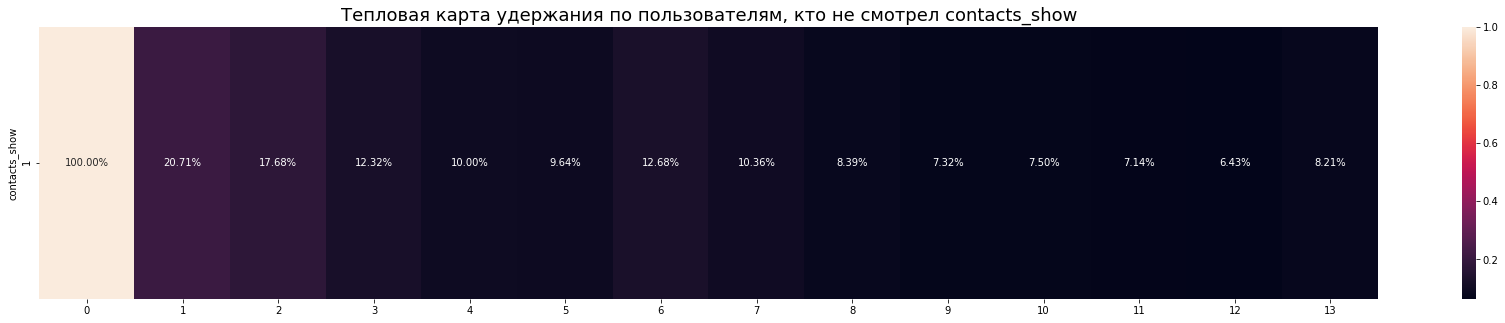

In [120]:
plt.figure(figsize=(30, 5))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по пользователям, кто не смотрел contacts_show', size =18)  # название графика
plt.show()

In [121]:
report = retention.drop(columns = ['cohort_sizes'])
report

0         1         2         3    4         5         6   \
contacts_show                                                               
1              1.0  0.207143  0.176786  0.123214  0.1  0.096429  0.126786   

                     7         8         9      10        11        12  \
contacts_show                                                            
1              0.103571  0.083929  0.073214  0.075  0.071429  0.064286   

                     13  
contacts_show            
1              0.082143

In [122]:
dimensions =['contacts_show']

def get_retention_rr(users_no_contacts_show, sessions_no_contacts_show, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users_no_contacts_show.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_no_contacts_show[['user_id', 'session_start', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit	']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(users_no_contacts_show, sessions_no_contacts_show, datetime(2019, 11, 4).date(), 14, dimensions =['contacts_show'], ignore_horizon = False
)


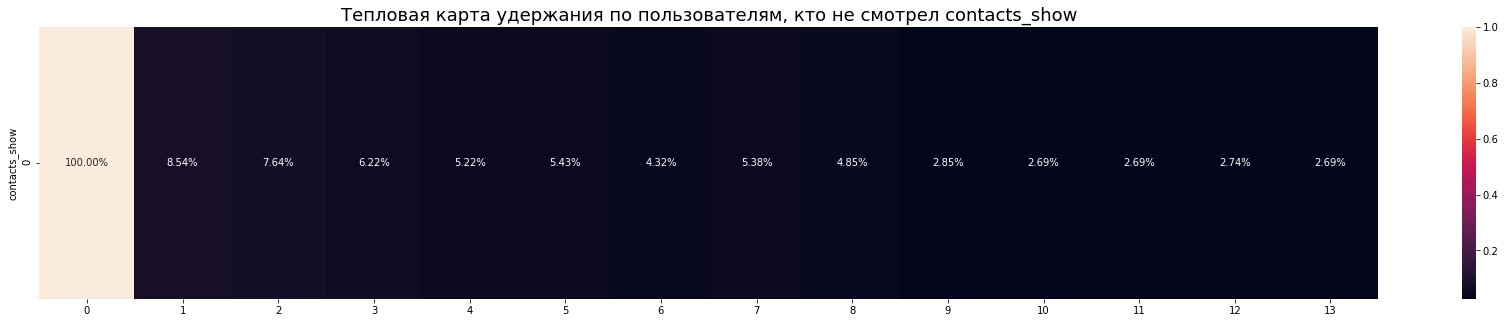

In [123]:
plt.figure(figsize=(30, 5))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по пользователям, кто не смотрел contacts_show', size =18)  # название графика
plt.show()

In [124]:
report = retention.drop(columns = ['cohort_sizes'])
report

0         1         2         3         4         5   \
contacts_show                                                          
0              1.0  0.085398  0.076436  0.062203  0.052188  0.054296   

                     6         7         8         9         10        11  \
contacts_show                                                               
0              0.043226  0.053769  0.048498  0.028466  0.026885  0.026885   

                     12        13  
contacts_show                      
0              0.027412  0.026885

##### **Группы - photos_show смотрели и не смотрели**

In [125]:
users_photos_show = profiles.query('photos_show >= 1')
sessions_photos_show = sessions_rr.query('photos_show >= 1')
users_no_photos_show = profiles.query('photos_show == 0')
sessions_no_photos_show = sessions_rr.query('photos_show == 0')

In [126]:
print('Количество пользователей в первой группе:', len(users_photos_show['user_id'].unique()))
print('Количество пользователей во второй группе:', len(users_no_photos_show['user_id'].unique()))

Количество пользователей в первой группе: 1095
Количество пользователей во второй группе: 3198


In [127]:
dimensions =['photos_show']

def get_retention_rr(users_photos_show, sessions_photos_show, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users_photos_show.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_photos_show[['user_id', 'session_start', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit	']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(users_photos_show, sessions_photos_show, datetime(2019, 11, 4).date(), 14, dimensions =['photos_show'], ignore_horizon = False
)

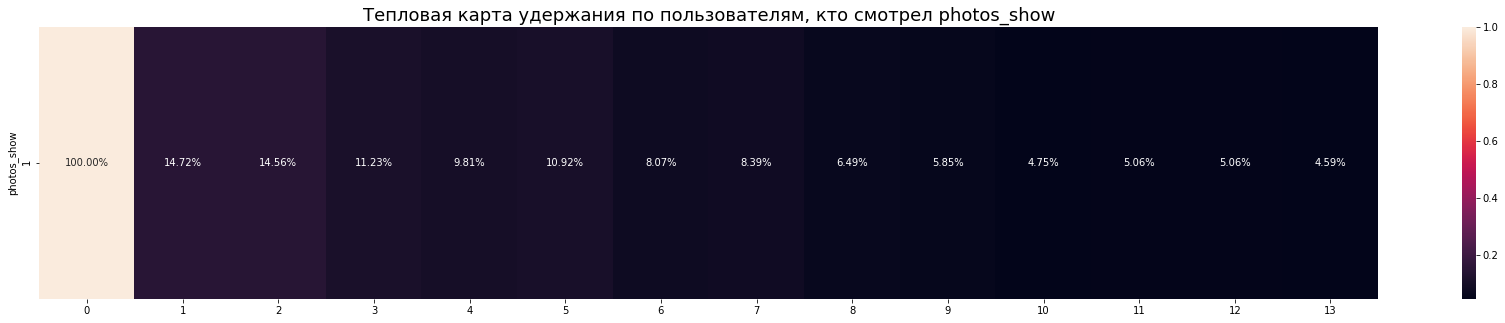

In [128]:
plt.figure(figsize=(30, 5))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по пользователям, кто смотрел photos_show', size =18)  # название графика
plt.show()

In [129]:
report = retention.drop(columns = ['cohort_sizes'])
report

0         1        2         3         4         5         6   \
photos_show                                                                   
1            1.0  0.147152  0.14557  0.112342  0.098101  0.109177  0.080696   

                   7         8         9         10        11        12  \
photos_show                                                               
1            0.083861  0.064873  0.058544  0.047468  0.050633  0.050633   

                   13  
photos_show            
1            0.045886

In [130]:
dimensions =['photos_no_show']

def get_retention_rr(users_no_photos_show, sessions_no_photos_show, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users_no_photos_show.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_no_photos_show[['user_id', 'session_start', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit	']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(users_no_photos_show, sessions_no_photos_show, datetime(2019, 11, 4).date(), 14, dimensions =['photos_show'], ignore_horizon = False
)

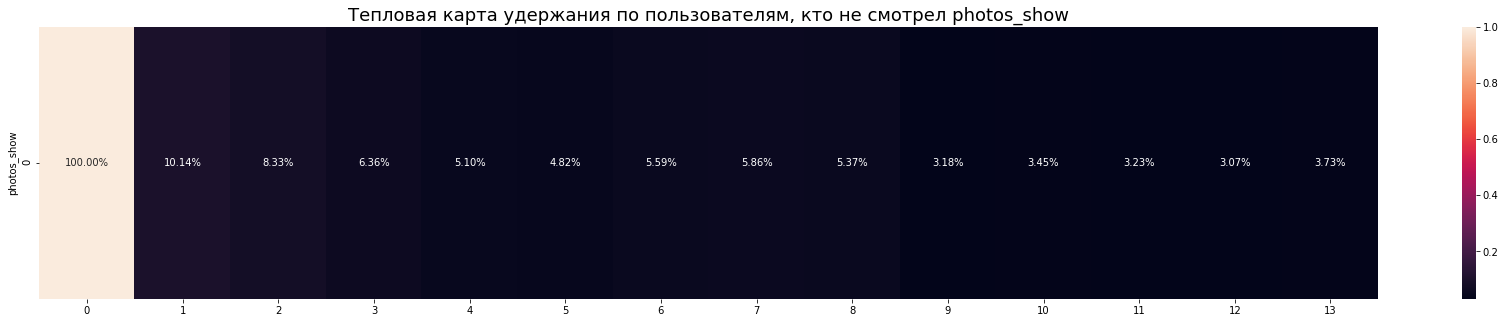

In [131]:
plt.figure(figsize=(30, 5))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по пользователям, кто не смотрел photos_show', size =18)  # название графика
plt.show()

In [132]:
report = retention.drop(columns = ['cohort_sizes'])
report

0        1         2         3         4         5        6   \
photos_show                                                                  
0            1.0  0.10137  0.083288  0.063562  0.050959  0.048219  0.05589   

                  7         8         9         10        11        12  \
photos_show                                                              
0            0.05863  0.053699  0.031781  0.034521  0.032329  0.030685   

                  13  
photos_show           
0            0.03726

##### **Группы, которые искали по приложению и не искали**

In [133]:
users_search = profiles.query('search >= 1')
sessions_search = sessions_rr.query('search >= 1')
users_no_search = profiles.query('search == 0')
sessions_no_search = sessions_rr.query('search == 0')

In [134]:
print('Количество пользователей в первой группе:', len(users_search['user_id'].unique()))
print('Количество пользователей во второй группе:', len(users_no_search['user_id'].unique()))

Количество пользователей в первой группе: 1666
Количество пользователей во второй группе: 2627


In [135]:
dimensions =['search']

def get_retention_rr(users_search, sessions_search, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users_search.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_search[['user_id', 'session_start', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit	']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(users_search, sessions_search, datetime(2019, 11, 4).date(), 14, dimensions =['search'], ignore_horizon = False
)

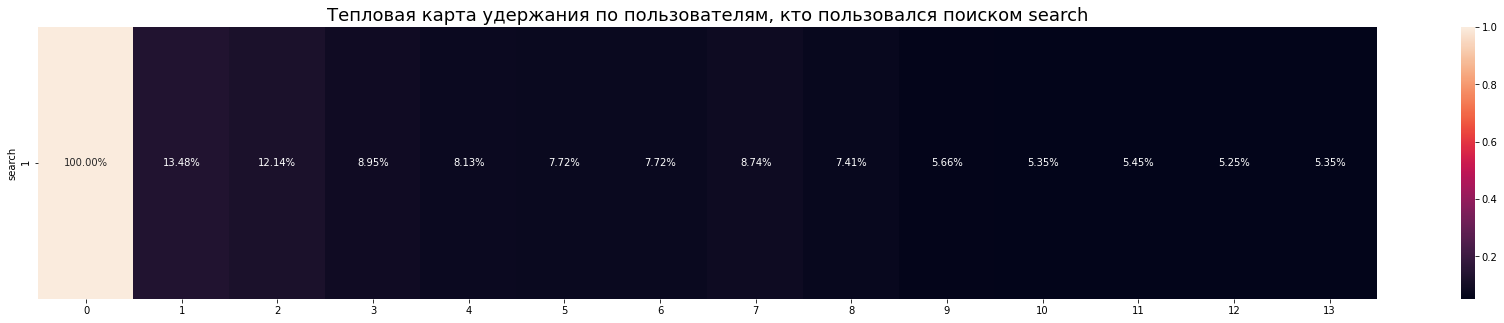

In [136]:
plt.figure(figsize=(30, 5))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по пользователям, кто пользовался поиском search', size =18)  # название графика
plt.show()

In [137]:
report = retention.drop(columns = ['cohort_sizes'])
report

0         1         2         3         4        5        6   \
search                                                                  
1       1.0  0.134774  0.121399  0.089506  0.081276  0.07716  0.07716   

              7         8         9         10        11        12        13  
search                                                                        
1       0.087449  0.074074  0.056584  0.053498  0.054527  0.052469  0.053498

In [138]:
dimensions =['search']

def get_retention_rr(users_no_search, sessions_no_search, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users_no_search.query('first_ts<= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(sessions_no_search[['user_id', 'session_start', 'dt']], on ='user_id', how ='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit	']).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_sizes'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_sizes'], axis=0)
    result_grouped = result_grouped[['cohort_sizes'] + list(range(horizon_days))]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_sizes'] = cohort_sizes
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

retention_raw, retention = get_retention(users_no_search, sessions_no_search, datetime(2019, 11, 4).date(), 14, dimensions =['search'], ignore_horizon = False
)

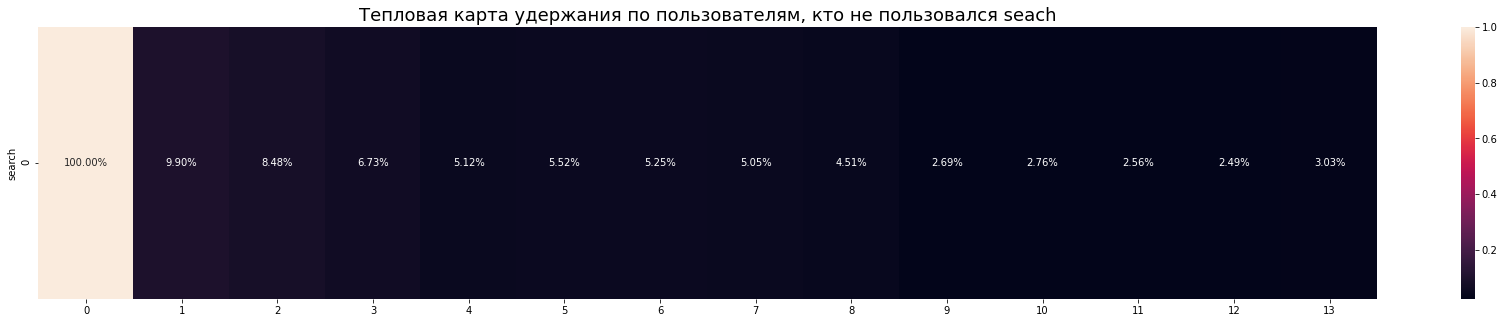

In [139]:
plt.figure(figsize=(30,5))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_sizes']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по пользователям, кто не пользовался seach', size =18)  # название графика
plt.show()

In [140]:
report = retention.drop(columns = ['cohort_sizes'])
report

0        1         2        3         4         5         6   \
search                                                                  
0       1.0  0.09899  0.084848  0.06734  0.051178  0.055219  0.052525   

              7         8         9         10        11        12        13  
search                                                                        
0       0.050505  0.045118  0.026936  0.027609  0.025589  0.024916  0.030303

##### **Вывод**

- Тепловые карты показывают, что пользователи, открывавшие контакты продавцов возвращаются активнее. 
- Просмотр фотографий не оказывают заметного влияния на удержание - хотя в первые несколько дней разница есть, к концу 14 дней остаются около 3-4% пользователей.
- Те, кто пользовался поиском на сайте, охотнее возвращаются в первые дни после посещения приложения. Потом их удержание такое же как и у тех, кто поиском не пользуется. Поиск помогает только в первые 3-4 дня.

#### **Расчет конверсий в ЦД по группам**

In [141]:
f = lambda t: t.diff().gt(pd.Timedelta('30T')).cumsum()
sessions['session_num'] = sessions.groupby('user_id')['event_time'].apply(f) + 1

In [142]:
sessions

user_id          event_time  session_id  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46           1   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31           1   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06           1   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21           1   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31           1   
...                                     ...                 ...         ...   
73074  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:24       10368   
73075  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:58       10368   
73076  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:07:41       10368   
73077  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:18       10368   
73078  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:25       10368   

          event_name  source  session_per_user       session_start  \
0          tips_show   other                 1 2019-10-07 13:39:46   
1          tips_show   other                 1 2019-10-07 13:40:31   
2          tips_show   other                 1 2019-10-07 13:41:06   
3          tips_show   other                 1 2019-10-07 13:43:21   
4          tips_show   other                 1 2019-10-07 13:45:31   
...              ...     ...               ...                 ...   
73074      tips_show  google                30 2019-11-03 15:51:24   
73075  contacts_show  google                30 2019-11-03 15:51:58   
73076      tips_show  google                30 2019-11-03 16:07:41   
73077      tips_show  google                30 2019-11-03 16:08:18   
73078      tips_show  google                30 2019-11-03 16:08:25   

              session_end  events_count         first_visit  lifetime length  \
0     2019-10-07 13:39:46             1 2019-10-07 13:39:46         0 0 days   
1     2019-10-07 13:40:31             1 2019-10-07 13:39:46         0 0 days   
2     2019-10-07 13:41:06             1 2019-10-07 13:39:46         0 0 days   
3     2019-10-07 13:43:21             1 2019-10-07 13:39:46         0 0 days   
4     2019-10-07 13:45:31             1 2019-10-07 13:39:46         0 0 days   
...                   ...           ...                 ...       ...    ...   
73074 2019-11-03 15:51:24             1 2019-10-12 00:57:21        22 0 days   
73075 2019-11-03 15:51:58             1 2019-10-12 00:57:21        22 0 days   
73076 2019-11-03 16:07:41             1 2019-10-12 00:57:21        22 0 days   
73077 2019-11-03 16:08:18             1 2019-10-12 00:57:21        22 0 days   
73078 2019-11-03 16:08:25             1 2019-10-12 00:57:21        22 0 days   

       length_sec  session_num  
0             0.0            1  
1             0.0            1  
2             0.0            1  
3             0.0            1  
4             0.0            1  
...           ...          ...  
73074         0.0           30  
73075         0.0           30  
73076         0.0           30  
73077         0.0           30  
73078         0.0           30  

[73079 rows x 14 columns]

In [143]:
def add_sign(event):

    sessions[event] = ""
    for i in range(len(sessions['event_name'])):
        if sessions['event_name'][i] == event:
            sessions[event][i] = 1
        else:
            sessions[event][i] = 0

In [144]:
add_sign('contacts_show')

In [145]:
add_sign('photos_show')

In [146]:
add_sign('search')

In [147]:
sessions.head()

user_id          event_time  session_id  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46           1   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31           1   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06           1   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21           1   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31           1   

  event_name source  session_per_user       session_start         session_end  \
0  tips_show  other                 1 2019-10-07 13:39:46 2019-10-07 13:39:46   
1  tips_show  other                 1 2019-10-07 13:40:31 2019-10-07 13:40:31   
2  tips_show  other                 1 2019-10-07 13:41:06 2019-10-07 13:41:06   
3  tips_show  other                 1 2019-10-07 13:43:21 2019-10-07 13:43:21   
4  tips_show  other                 1 2019-10-07 13:45:31 2019-10-07 13:45:31   

   events_count         first_visit  lifetime length  length_sec  session_num  \
0             1 2019-10-07 13:39:46         0 0 days         0.0            1   
1             1 2019-10-07 13:39:46         0 0 days         0.0            1   
2             1 2019-10-07 13:39:46         0 0 days         0.0            1   
3             1 2019-10-07 13:39:46         0 0 days         0.0            1   
4             1 2019-10-07 13:39:46         0 0 days         0.0            1   

  contacts_show photos_show search  
0             0           0      0  
1             0           0      0  
2             0           0      0  
3             0           0      0  
4             0           0      0

##### **Группы, которые достигали ЦД и нет**

In [148]:
#подготовим данные для работы и дальнейшего расчета конверсии по достижению цели -просмотр контактов
grouped_by_user = sessions.groupby('user_id').agg({'session_num':'count', 
                                                          'event_name':'count',
                                                          'contacts_show':'sum', 
                                                          'photos_show':'max',
                                                          'photos_show':'max',
                                                          'search':'max'})
grouped_by_user = grouped_by_user.rename(columns={'session_num':'n_session', 'event_name':'n_event', 'contacts_show':'n_contacts_show'})
grouped_by_user

n_session  n_event  n_contacts_show  \
user_id                                                                     
0001b1d5-b74a-4cbf-aeb0-7df5947bf349         35       35                0   
00157779-810c-4498-9e05-a1e9e3cedf93         71       71               11   
00463033-5717-4bf1-91b4-09183923b9df         10       10                0   
004690c3-5a84-4bb7-a8af-e0c8f8fca64e         32       32                0   
00551e79-152e-4441-9cf7-565d7eb04090          8        8                3   
...                                         ...      ...              ...   
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07         17       17                0   
ffc01466-fdb1-4460-ae94-e800f52eb136          6        6                1   
ffcf50d9-293c-4254-8243-4890b030b238          2        2                0   
ffe68f10-e48e-470e-be9b-eeb93128ff1a         13       13                1   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b        302      302               68   

                                      photos_show  search  
user_id                                                    
0001b1d5-b74a-4cbf-aeb0-7df5947bf349            0       0  
00157779-810c-4498-9e05-a1e9e3cedf93            1       1  
00463033-5717-4bf1-91b4-09183923b9df            1       0  
004690c3-5a84-4bb7-a8af-e0c8f8fca64e            0       1  
00551e79-152e-4441-9cf7-565d7eb04090            1       1  
...                                           ...     ...  
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07            0       0  
ffc01466-fdb1-4460-ae94-e800f52eb136            1       0  
ffcf50d9-293c-4254-8243-4890b030b238            0       0  
ffe68f10-e48e-470e-be9b-eeb93128ff1a            1       1  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b            0       0  

[4293 rows x 5 columns]

In [149]:
grouped_by_user['conversion'] = grouped_by_user['n_contacts_show']/grouped_by_user['n_session']
grouped_by_user

n_session  n_event  n_contacts_show  \
user_id                                                                     
0001b1d5-b74a-4cbf-aeb0-7df5947bf349         35       35                0   
00157779-810c-4498-9e05-a1e9e3cedf93         71       71               11   
00463033-5717-4bf1-91b4-09183923b9df         10       10                0   
004690c3-5a84-4bb7-a8af-e0c8f8fca64e         32       32                0   
00551e79-152e-4441-9cf7-565d7eb04090          8        8                3   
...                                         ...      ...              ...   
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07         17       17                0   
ffc01466-fdb1-4460-ae94-e800f52eb136          6        6                1   
ffcf50d9-293c-4254-8243-4890b030b238          2        2                0   
ffe68f10-e48e-470e-be9b-eeb93128ff1a         13       13                1   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b        302      302               68   

                                      photos_show  search  conversion  
user_id                                                                
0001b1d5-b74a-4cbf-aeb0-7df5947bf349            0       0    0.000000  
00157779-810c-4498-9e05-a1e9e3cedf93            1       1    0.154930  
00463033-5717-4bf1-91b4-09183923b9df            1       0    0.000000  
004690c3-5a84-4bb7-a8af-e0c8f8fca64e            0       1    0.000000  
00551e79-152e-4441-9cf7-565d7eb04090            1       1    0.375000  
...                                           ...     ...         ...  
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07            0       0    0.000000  
ffc01466-fdb1-4460-ae94-e800f52eb136            1       0    0.166667  
ffcf50d9-293c-4254-8243-4890b030b238            0       0    0.000000  
ffe68f10-e48e-470e-be9b-eeb93128ff1a            1       1    0.076923  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b            0       0    0.225166  

[4293 rows x 6 columns]

In [150]:
users_contacts_show = grouped_by_user.query('n_contacts_show >= 1')
users_no_contacts_show = grouped_by_user.query('n_contacts_show < 1')
users_contacts_show 

n_session  n_event  n_contacts_show  \
user_id                                                                     
00157779-810c-4498-9e05-a1e9e3cedf93         71       71               11   
00551e79-152e-4441-9cf7-565d7eb04090          8        8                3   
005fbea5-2678-406f-88a6-fbe9787e2268          5        5                3   
00753c79-ea81-4456-acd0-a47a23ca2fb9         17       17                1   
007d031d-5018-4e02-b7ee-72a30609173f          8        8                2   
...                                         ...      ...              ...   
fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5         56       56               17   
ff1554b5-919e-40b1-90bb-ee1f7f6d5846          6        6                1   
ffc01466-fdb1-4460-ae94-e800f52eb136          6        6                1   
ffe68f10-e48e-470e-be9b-eeb93128ff1a         13       13                1   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b        302      302               68   

                                      photos_show  search  conversion  
user_id                                                                
00157779-810c-4498-9e05-a1e9e3cedf93            1       1    0.154930  
00551e79-152e-4441-9cf7-565d7eb04090            1       1    0.375000  
005fbea5-2678-406f-88a6-fbe9787e2268            0       0    0.600000  
00753c79-ea81-4456-acd0-a47a23ca2fb9            1       1    0.058824  
007d031d-5018-4e02-b7ee-72a30609173f            0       0    0.250000  
...                                           ...     ...         ...  
fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5            0       1    0.303571  
ff1554b5-919e-40b1-90bb-ee1f7f6d5846            1       1    0.166667  
ffc01466-fdb1-4460-ae94-e800f52eb136            1       0    0.166667  
ffe68f10-e48e-470e-be9b-eeb93128ff1a            1       1    0.076923  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b            0       0    0.225166  

[981 rows x 6 columns]

In [151]:
#конверсия в ЦД по пользователям
Conversion_users_contats_show = len(users_contacts_show)/(len(users_contacts_show)+len(users_no_contacts_show))
Conversion_users_contats_show

0.22851153039832284

In [152]:
# Конверсия в ЦД по сессиям
users_contacts_show.describe()

n_session     n_event  n_contacts_show  photos_show      search  \
count  981.000000  981.000000       981.000000   981.000000  981.000000   
mean    27.115189   27.115189         4.465851     0.345566    0.384302   
std     46.437120   46.437120         8.982642     0.475795    0.486678   
min      1.000000    1.000000         1.000000     0.000000    0.000000   
25%      7.000000    7.000000         1.000000     0.000000    0.000000   
50%     13.000000   13.000000         2.000000     0.000000    0.000000   
75%     27.000000   27.000000         4.000000     1.000000    1.000000   
max    472.000000  472.000000       137.000000     1.000000    1.000000   

       conversion  
count  981.000000  
mean     0.256628  
std      0.232016  
min      0.003472  
25%      0.090909  
50%      0.187500  
75%      0.333333  
max      1.000000

In [153]:
users_no_contacts_show.describe()

n_session      n_event  n_contacts_show  photos_show       search  \
count  3312.000000  3312.000000           3312.0  3312.000000  3312.000000   
mean     14.033514    14.033514              0.0     0.228261     0.389191   
std      19.602076    19.602076              0.0     0.419775     0.487640   
min       1.000000     1.000000              0.0     0.000000     0.000000   
25%       5.000000     5.000000              0.0     0.000000     0.000000   
50%       8.000000     8.000000              0.0     0.000000     0.000000   
75%      15.000000    15.000000              0.0     0.000000     1.000000   
max     407.000000   407.000000              0.0     1.000000     1.000000   

       conversion  
count      3312.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0.0  
50%           0.0  
75%           0.0  
max           0.0

**Вывод**
- Средняя конверсия в ЦД - 25%, так как считали по сессиям, у одного пользователя может быть несколько достижений цели.
- Если считать конверсию в ЦД по пользователям то будет 22-23%.
- Понятно, что кто контакты не смотрел, у того ЦД равно нулю, их не рассматриваем. Однако их много 3312 уникальных пользователей.
- ЦД достигло 981 уникальных пользователей. 


##### **Группы - photos_show смотрели и не смотрели**

- пользователи, кто смотрел фото, и совершил ЦД - 339 пользователей
- пользоватлеи, кто смотрел фото, и не совершил ЦД - 756 пользователей
- пользоватлеи, кто не смотрел фото, и совершил ЦД - 642 пользователя
- пользоватлеи, кто не смотрел фото, и не соверлили ЦД - 2556 пользователей

In [154]:
#группируем по тем, кто смотрел и не смотрел фото
users_yes_photos_show = grouped_by_user.query('photos_show >= 1')
users_no_photos_show = grouped_by_user.query('photos_show == 0')

In [155]:
# пользователи, кто смотрел фото
len(users_yes_photos_show)

1095

In [156]:
# пользователи, кто не смотрел фото
len(users_no_photos_show)

3198

In [157]:
#рассчитываем конверсию в просмотр фото по пользователям
Conversion_users_photos_show = len(users_yes_photos_show)/(len(users_yes_photos_show)+len(users_no_photos_show))
Conversion_users_photos_show

0.25506638714185886

In [158]:
#рассмотрим пользователей, кто, смотрел фото, но при этом совершал ЦД и кто не совершил
users_yes_photos_show_yes_contact = users_yes_photos_show.query('n_contacts_show >= 1')
users_yes_photos_show_no_contact=users_yes_photos_show.query('n_contacts_show == 0')

In [159]:
# число пользоватлей, которые совершили ЦД и просмотрели фото
len(users_yes_photos_show_yes_contact)

339

In [160]:
# число пользоватлей, которые совершили ЦД, но не смотрели фото
len(users_yes_photos_show_no_contact)

756

In [161]:
#конверсия в ЦД, по тем, кто смотрел фото - ЦД +, Photo +
Conversion_users_yes_photos_yes_show_contact = len(users_yes_photos_show_yes_contact)/(len(users_yes_photos_show))
Conversion_users_yes_photos_yes_show_contact

0.3095890410958904

In [162]:
#рассмотрим пользователей, кто, не смотрел фото, но при этом совершал ЦД.
users_no_photos_show = grouped_by_user.query('photos_show == 0')
users_no_photos_show_yes_contact=users_no_photos_show.query('n_contacts_show >= 1')
users_no_photos_show_no_contact=users_no_photos_show.query('n_contacts_show == 0')


In [163]:
# число пользоватлей, которые совершили ЦД и не смотрели фото ЦД+ Фото -
len(users_no_photos_show_yes_contact)

642

In [164]:
# число пользоватлей, которые не совершили ЦД и не смотрели фото  ЦД - Фото -
len(users_no_photos_show_no_contact)

2556

In [165]:
#конверсия в ЦД, по тем, кто не смотрел фото  - ЦД +, Фото +
Conversion_users_no_photos_show_yes_contact= len(users_no_photos_show_yes_contact)/(len(users_no_photos_show))
Conversion_users_no_photos_show_yes_contact

0.20075046904315197

**Вывод:**

    - число пользователей, кто посмотрел контакты - сделала ЦД составляет 339 пользователей. У тех пользователей, кто посмотрел фото, конверсия в ЦД - 30 %.
    - число пользователей, кто не смотрел фото, но сделала ЦД - 642, однако их конверсия всего 20%.
    - этого говорит о том, что просмотр фото лучше конвертирует в ЦД, более чем на 10%.
    - однако пользоватлей кто просматривает фото меньше, надо продумать как чаще показывать фото людям.
    

##### **Группы искавшие по приложению и нет**

- пользователи, кто пользовался поиском в приложении, и совершил ЦД - 337 пользователей
- пользоватлеи, кто пользовался поиском в приложении, и не совершил ЦД - 1289 пользователей
- пользоватлеи, кто не пользовался поиском в приложении, и совершил ЦД - 604 пользователя
- пользоватлеи, кто не пользовался поиском в приложении, и не соверлили ЦД - 2023 пользователей - их не рассматриваем

In [166]:
users_search = grouped_by_user.query('search >= 1')
users_no_search = grouped_by_user.query('search == 0')

In [167]:
#всего пользователей, кто ищет по приложению
len(users_search)

1666

In [168]:
#всего пользователей, кто не ищет по приложению
len(users_no_search)

2627

In [169]:
#конверсия из всех пользоватлей в тех кто пользовался поиском по приложению
Conversion_users_search = len(users_search)/(len(users_search)+len(users_no_search))
Conversion_users_search

0.38807360819939435

In [170]:
#рассмотрим пользователей, кто, не смотрел фото, но при этом совершал ЦД.
users_yes_search_yes_contact_show = users_search.query('n_contacts_show >= 1')
users_yes_search_no_contact_show=users_search.query('n_contacts_show == 0')

In [171]:
#всего пользователей, кто ищет по приложению и совершает ЦД S+ Contact+
len(users_yes_search_yes_contact_show)

377

In [172]:
#всего пользователей, кто ищет по приложению и не совершает ЦД S+ Contact -
len(users_yes_search_no_contact_show)

1289

In [173]:
#конверсия в ЦД, по тем, кто пользуется поиском  - ЦД +, Поиск +
Conversion_users_yes_search_yes_contact_show = len(users_yes_search_yes_contact_show)/(len(users_search))
Conversion_users_yes_search_yes_contact_show

0.2262905162064826

In [174]:
#рассмотрим пользователей, кто, не искал, но при этом совершал ЦД.
users_no_search_yes_contact=users_no_search.query('n_contacts_show >= 1')
users_no_search_no_contact=users_no_search.query('n_contacts_show == 0')


In [175]:
#всего пользователей, кто делает ЦД и не ищет по приложению
len(users_no_search_yes_contact)

604

In [176]:
#конверсия в ЦД, по тем, кто не пользовался поиском  - ЦД +, Поиск -
Conversion_users_no_search_yes_contact = len(users_no_search_yes_contact)/(len(users_no_search))
Conversion_users_no_search_yes_contact

0.2299200609059764

**Вывод:**

- 1666 пользователей, пользуются поиском по приложению. Из них 337 человека совершают ЦД. Конверсия в ЦД составляет 22%.
- 2627 пользователей не пользуются поиском в приложении и достигают ЦД из них 6044 пользователя. Конверсия в ЦД составляет 23%.
- Конверсии практически одинаковые и у тех и у других. 
- Здесь можно сделать вывод, что поиск никак не влияет на конверсию в ЦД.
- однако чтобы улучить приложение, возможно выгрузить все поисковые запросы и проанализировать их. Также в них можно найти много идей для развития бизнеса.

#### **Среднее время просмотра страниц**

In [177]:
print('Среднее время просмотра страниц {:.2f}'.format(data['diff_sec'].mean()))

Среднее время просмотра страниц 13373.74


In [178]:
#создадимм список пользователей совершивших целевое действие
filtered_users = data.query('event_name =="contacts_show"')['user_id'].unique()
filtered_users_list = list(filtered_users)
len(filtered_users_list)

981

In [179]:
print('Среднее время просмотра страниц у пользователей совершивших целевое действие {:.2f}'.format(data.query('user_id == @filtered_users_list')['diff_sec'].mean()))

Среднее время просмотра страниц у пользователей совершивших целевое действие 12517.07


In [180]:
print('Среднее время просмотра страниц у пользователей не совершивших целевое действие {:.2f}'
      .format(data.query('user_id != @filtered_users_list')['diff_sec'].mean()))

Среднее время просмотра страниц у пользователей не совершивших целевое действие 13864.02


**Вывод:**
    
- Среднее время достигших цели не значительно больше не достигших.


#### **События, которые чаще всего предшествовали ЦД**

In [181]:
#посмортим события которые привели к ЦД 
data[data['event_name'].shift(-1)=='contacts_show'].groupby('event_name')['event_time'].count().to_frame()

event_time
event_name               
advert_open            80
contacts_call         208
contacts_show        1386
favorites_add          48
map                    63
photos_show           445
search                247
tips_click             13
tips_show            1891

#### **Выводы**

- Чаще всего пользователь переходит к просмотру контактов после того как увидел рекомендованное объявления, потом должен быть как клик по нему, но его нет. Значит Переход в контакты не справоцировало рекомендованное объявление - может просто просмотр его да, но не сам контакт из рекомендованного объявления. 
- Вопрос качества рекомендаций стоит остро - рекомендации скоей всего показываются не релевантные так как по ним не кликают. 
- Видно из данных, что пользователь смотрит фото и ищет информацию по приложению, что влечет за собой  конверсию в ЦД. Значит, надо обратить на фото в приложении и уделить им особое внимание - раз они приводят к конверсии в ЦД.
- Пользователи, кто пользуется поиском по приложению чуть хуже достигают ЦД. Но Их процент также хорош 4% против 6%, тех кто не пользуется поиском. Надо понять, что они ищут в приложении и попробовать дать ответы заранее. Тогда люди лучше будут конвертироваться в ЦД.

### **Шаг 5. Проверка статистических гипотез**


- Гипотеза 1. Проверить гипотезу о различии или равенстве конверсий в просмотры контактов между теми пользователями, которые совершили установку приложения, прийдя с источника yandex и пользователя, совершившими установки, из источника google.

**Проверим гипотезу**: две группы (одни по источнику с yandex, другие с google) демонстрируют разную конверсию в просмотры контактов.

**Гипотеза H0**: между пользователями, установившими приложение из разных источников, нет значимой разницы в конверсии в просмотры контактов.

**Гипотеза H1**: между пользователями, установившими приложение из разных источников, значимая разница есть в конверсии в просмотры контактов.


In [182]:
users_profiles

user_id       session_start  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:40:31   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:41:06   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:43:21   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:45:31   
...                                     ...                 ...   
72935  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:24   
72936  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 15:51:58   
72937  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:07:41   
72938  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:18   
72939  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-11-03 16:08:25   

              first_visit  lifetime  session_per_user  length_sec  \
0     2019-10-07 13:39:46         0                 1         0.0   
1     2019-10-07 13:39:46         0                 1         0.0   
2     2019-10-07 13:39:46         0                 1         0.0   
3     2019-10-07 13:39:46         0                 1         0.0   
4     2019-10-07 13:39:46         0                 1         0.0   
...                   ...       ...               ...         ...   
72935 2019-10-12 00:57:21        22                30         0.0   
72936 2019-10-12 00:57:21        22                30         0.0   
72937 2019-10-12 00:57:21        22                30         0.0   
72938 2019-10-12 00:57:21        22                30         0.0   
72939 2019-10-12 00:57:21        22                30         0.0   

       events_count source_y  tips_show  map  search  photos_show  \
0                 1    other          1    1       0            0   
1                 1    other          1    1       0            0   
2                 1    other          1    1       0            0   
3                 1    other          1    1       0            0   
4                 1    other          1    1       0            0   
...             ...      ...        ...  ...     ...          ...   
72935             1   google          1    1       0            0   
72936             1   google          1    1       0            0   
72937             1   google          1    1       0            0   
72938             1   google          1    1       0            0   
72939             1   google          1    1       0            0   

       favorites_add  contacts_show  contacts_call  advert_open  tips_click  \
0                  0              0              0            0           0   
1                  0              0              0            0           0   
2                  0              0              0            0           0   
3                  0              0              0            0           0   
4                  0              0              0            0           0   
...              ...            ...            ...          ...         ...   
72935              0              1              0            0           0   
72936              0              1              0            0           0   
72937              0              1              0            0           0   
72938              0              1              0            0           0   
72939              0              1              0            0           0   

       source_x_google  source_x_other  source_x_yandex  
0                    0               1                0  
1                    0               1                0  
2                    0               1                0  
3                    0               1                0  
4                    0               1                0  
...                ...             ...              ...  
72935                1               0                0  
72936                1               0                0  
72937                1               0                0  
72938                1               0      

In [183]:
#расчитаем кол-во пользователей, по источникам, которые совершили ЦД - просмотр контактов
target_source = (users_profiles.pivot_table(index='source_y', 
                              values=['contacts_show', 'user_id'],
                              aggfunc={'user_id':'count','contacts_show':'sum'})
                )
target_source = target_source.rename(columns={'user_id' : 'total'})
target_source

contacts_show  total
source_y                      
google             8402  20133
other              5905  19005
yandex            12233  33802

In [184]:
#проверим вручную данные
google_users = data.query('source == "google"')
yandex_users = data.query('source == "yandex"')
all_yandex_users = yandex_users.user_id.nunique()
all_google_users = google_users.user_id.nunique()
success_yandex = yandex_users.query('event_name=="contacts_show" & source == "yandex"').user_id.nunique()
success_google = google_users.query('event_name=="contacts_show" & source == "google"').user_id.nunique()
conversion_yandex = success_yandex /all_yandex_users
conversion_google = success_google /all_google_users
print(f'Конверсия из Яндекс в ЦД: {conversion_yandex:.2%}')
print(f'Конверсия из Google в ЦД: {conversion_google:.2%}')

Конверсия из Яндекс в ЦД: 24.72%
Конверсия из Google в ЦД: 24.36%


In [185]:
alpha = .05 # критический уровень статистической значимости

success = np.array([success_google, success_yandex])
trials = np.array([all_google_users, all_yandex_users]) 
        
# пропорция успехов в первой группе:
p1 = success[0]/trials[0]

# пропорция успехов во второй группе:
p2 = success[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (success[0] + success[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2
print(f'p_values = {p_value}')
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий нет") 

p_values = 0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий нет


Вывод: Источник установки на конверсию не влияет

- **Гипотеза 2.** Проверить гипотезу о различии или равенстве проведенном среднем времи в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его.

**Нулевая гипотеза Н0:** Среднее время в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его, равно.

**Альтернативная гипотеза Н1:** Среднее время в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его, различается.



In [186]:
data['diff_sec'] = data['diff_sec'].astype('timedelta64[m]')

In [187]:
contacts_show_data = data.query('event_name == "contacts_show"') 
users_contacts_show = contacts_show_data['user_id'].unique()
push_contacts_show = data[data['user_id'].isin(users_contacts_show)]

push_contacts_show['diff_sec'] = push_contacts_show['diff_sec'].astype('int')
    
push_contacts_show

event_time     event_name  \
42244 2019-10-19 21:34:34         search   
42245 2019-10-19 21:35:19         search   
42246 2019-10-19 21:36:44         search   
42247 2019-10-19 21:40:39    photos_show   
42248 2019-10-19 21:42:14    photos_show   
...                   ...            ...   
18686 2019-11-03 15:51:24      tips_show   
18687 2019-11-03 15:51:58  contacts_show   
18688 2019-11-03 16:07:41      tips_show   
18689 2019-11-03 16:08:18      tips_show   
18690 2019-11-03 16:08:25      tips_show   

                                    user_id  source          event_date  \
42244  00157779-810c-4498-9e05-a1e9e3cedf93  yandex 2019-10-19 21:34:34   
42245  00157779-810c-4498-9e05-a1e9e3cedf93  yandex 2019-10-19 21:35:19   
42246  00157779-810c-4498-9e05-a1e9e3cedf93  yandex 2019-10-19 21:36:44   
42247  00157779-810c-4498-9e05-a1e9e3cedf93  yandex 2019-10-19 21:40:39   
42248  00157779-810c-4498-9e05-a1e9e3cedf93  yandex 2019-10-19 21:42:14   
...                                     ...     ...                 ...   
18686  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:24   
18687  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:58   
18688  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:07:41   
18689  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:18   
18690  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:25   

         event_dt             diff        diff_sec  session_id  \
42244  2019-10-19                0               0           5   
42245  2019-10-19  0 days 00:00:45   2700000000000           5   
42246  2019-10-19  0 days 00:01:25   5100000000000           5   
42247  2019-10-19  0 days 00:03:55  14100000000000           5   
42248  2019-10-19  0 days 00:01:35   5700000000000           5   
...           ...              ...             ...         ...   
18686  2019-11-03  0 days 00:00:28   1680000000000       10368   
18687  2019-11-03  0 days 00:00:34   2040000000000       10368   
18688  2019-11-03  0 days 00:15:43  56580000000000       10368   
18689  2019-11-03  0 days 00:00:37   2220000000000       10368   
18690  2019-11-03  0 days 00:00:07    420000000000       10368   

       session_per_user  event_hour  event_weekday  
42244                 1          21              5  
42245                 1          21              5  
42246                 1          21              5  
42247                 1          21              5  
42248                 1          21              5  
...                 ...         ...            ...  
18686                30          15              6  
18687                30          15              6  
18688                30          16              6  
18689                30          16              6  
18690                30          16              6  

[26600 rows x 12 columns]

In [188]:
not_contacts_show = data[~data['user_id'].isin(users_contacts_show)]
not_contacts_show['diff_sec'] = not_contacts_show['diff_sec'].astype('int')    
not_contacts_show

event_time event_name                               user_id  \
2148  2019-10-07 13:39:46  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2149  2019-10-07 13:40:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2150  2019-10-07 13:41:06  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2151  2019-10-07 13:43:21  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2152  2019-10-07 13:45:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
...                   ...        ...                                   ...   
22992 2019-10-26 19:42:23  tips_show  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07   
22993 2019-10-26 19:48:44  tips_show  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07   
22994 2019-10-26 19:53:52  tips_show  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07   
50442 2019-10-23 11:51:35  tips_show  ffcf50d9-293c-4254-8243-4890b030b238   
50443 2019-10-23 11:52:56        map  ffcf50d9-293c-4254-8243-4890b030b238   

       source          event_date    event_dt             diff  \
2148    other 2019-10-07 13:39:46  2019-10-07                0   
2149    other 2019-10-07 13:40:31  2019-10-07  0 days 00:00:45   
2150    other 2019-10-07 13:41:06  2019-10-07  0 days 00:00:35   
2151    other 2019-10-07 13:43:21  2019-10-07  0 days 00:02:15   
2152    other 2019-10-07 13:45:31  2019-10-07  0 days 00:02:10   
...       ...                 ...         ...              ...   
22992  yandex 2019-10-26 19:42:23  2019-10-26  0 days 00:01:51   
22993  yandex 2019-10-26 19:48:44  2019-10-26  0 days 00:06:21   
22994  yandex 2019-10-26 19:53:52  2019-10-26  0 days 00:05:08   
50442  google 2019-10-23 11:51:35  2019-10-23                0   
50443  google 2019-10-23 11:52:56  2019-10-23  0 days 00:01:21   

             diff_sec  session_id  session_per_user  event_hour  event_weekday  
2148                0           1                 1          13              0  
2149    2700000000000           1                 1          13              0  
2150    2100000000000           1                 1          13              0  
2151    8100000000000           1                 1          13              0  
2152    7800000000000           1                 1          13              0  
...               ...         ...               ...         ...            ...  
22992   6660000000000       10333                 2          19              5  
22993  22860000000000       10333                 2          19              5  
22994  18480000000000       10333                 2          19              5  
50442               0       10335                 1          11              2  
50443   4860000000000       10335                 1          11              2  

[46479 rows x 12 columns]

In [189]:
alpha = .05

results = st.ttest_ind(
    push_contacts_show['diff_sec'], 
    not_contacts_show['diff_sec'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, различия статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистически значимых различий нет") 
print(f"Среднее время в приложении, у пользователей совершивших целевое действие: {push_contacts_show['diff_sec'].mean():2f}")
print(f"Среднее время в приложении, у пользователей не совершивших целевое действие: {not_contacts_show['diff_sec'].mean():2f}")

p-значение: 0.03867575879441125
Отвергаем нулевую гипотезу, различия статистически значимы
Среднее время в приложении, у пользователей совершивших целевое действие: 751024066917293.125000
Среднее время в приложении, у пользователей не совершивших целевое действие: 831841027560833.875000


#### **Вывод**

- Между пользователями, установившими приложение из разных источников, нет значимой разницы. Можно сделать вывод, что источник установки на конверсию не влияет.
- По результатам проведенного тестирования, была отвергнула нулевая гипотеза . Можно сделать предлположение, что среднее время, проведенное в приложении, у групп пользователей, совершивших целевое действие(просмотр контактов) и не совершивших его, различается.

### **Выводы и рекомендации**

**В результате процесса предобработки данных было выявлено:**
- пропусков нет, дубликаты при слиянии данных были удалены;
- названия колонок приведены к удобному испрльзованию;
- формат тип данных также подправлен для дальнейшей работы с ними.

**По итогам исследовательского анализа данных было выявлено:**

- объединены события contacts_show и show_contacts имеющие один и тот же функционал;
- определено, что самое частое событие "пользователь увидел рекомендованные объявления", однако событие которое логично за ним бы следовало "пользователь кликнул по рекомендованному объявлению" только на 5 месте, возможно систему рекомендаций можно настроить лучше;
- конверсия пользователей в Целевое действие - 981 из 4293, это 22,8%;
- распределение пользователей и событий по дням достаточно равномерное;
- выделены сессии пользователей с таймаутом в 30 минут;
- выявлено, что самое популярное событие tips_show - показов 39892, далее photos_show - кликов 9372, search - 6766 поисков по приложению, advert_open- 6145 кликов по рекламе, contacts_show - 4381 просмотр контактов

**По итогам сегментации пользователей выявлено:**
- тепловые карты показывают, что пользователи, открывавшие контакты продавцов возвращаются активнее.
- просмотр фотографий не оказывают заметного влияния на удержание - хотя в первые несколько дней разница есть, к концу 14 дней остаются около 3-4% пользователей.
- те, кто пользовался поиском на сайте, охотнее возвращаются в первые дни после посещения приложения. Потом их удержание такое же как и у тех, кто поиском не пользуется. Поиск помогает только в первые 3-4 дня.
- чаще всего пользователь переходит к просмотру контактов после того как увидел рекомендованное объявления, потом должен быть как клик по нему, но его нет. Значит Переход в контакты не спровоцировало рекомендованное объявление - может просто просмотр его да, но не сам контакт из рекомендованного объявления.
- просмотр фото лучше конвертирует в ЦД, более чем на 10%, однако пользоватлей кто просматривает фото меньше, надо продумать как чаще показывать фото людям.
- можно сделать вывод, что поиск никак не влияет на конверсию в ЦД.
- Однако чтобы улучить приложение, возможно выгрузить все поисковые запросы и проанализировать их. Также в них можно найти много идей для развития бизнеса.

**По итогам проведенной статистической проверки выявлено:** 

- нет оснований считать доли пользователей совершивших целевое действие в группах, установивших приложение из yandex и google разными.
- есть статистически значимая разница между долями пользователей совершивших целевое действие в группах, где пользователи совершают больше и меньше 15 действий в приложении.

**Рекомендации:**

- при проведении рекламный акций, необходимо прописывать данные по ним, чтобы понимать как та, или иная акция влияет на пользователя. что сработало, а что нет.
- есть различные поисковые запросы в приложении от пользователей, было бы логично иметь доступ к ним, изучив запросы. Пользование и не пользование посиком в приложении никак не увеличивает конверсию в ЦД, однако это кладенец знаний, для развития бизнеса.
- проработать систему рекомендаций в приложении, сейчас она показывает низкую конвертируемость в целеове действие. Пользователь в малом количестве кликает на рекомендации.
- обратить внимание на фотографии в приложении, выделить наиболее конвертируемые в ЦД. Фотографии приносят хорошую конверсию.
- чтобы увеличить частоту посещений приложения возможны пуш-уведомление с приложения или письма по почте о событиях в приложениях или напоминания о том, что просматривали и еще интресно ли вам это.
